In [1]:
# importando as bibliotecas que serão utilizadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import seaborn as sns
import sklearn
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import requests
from matplotlib.backends.backend_pdf import PdfPages


In [6]:
print(sklearn.__version__)

1.6.1


In [25]:
import math

import matplotlib.pyplot as plt

import matplotlib.colors as mcolors
from matplotlib.patches import Rectangle


def plot_colortable(colors, *, ncols=4, sort_colors=True):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        names = sorted(
            colors, key=lambda c: tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(c))))
    else:
        names = list(colors)

    n = len(names)
    nrows = math.ceil(n / ncols)

    width = cell_width * ncols + 2 * margin
    height = cell_height * nrows + 2 * margin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-margin)/height)
    ax.set_xlim(0, cell_width * ncols)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

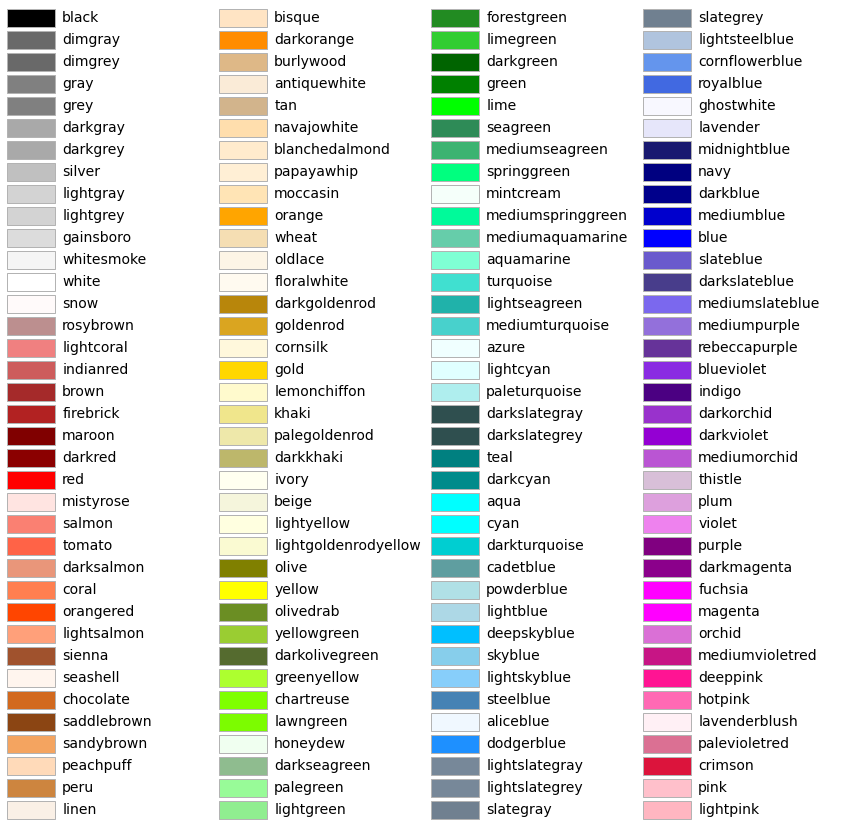

In [26]:
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

In [8]:
# Paleta dengue
paleta_dengue = ['midnightblue', 'royalblue', 'skyblue', 'slategray', 'lightsteelblue', 'lavender', 'slateblue', 'steelblue', 'blue', 'lightblue', 'darkslateblue', 'deepskyblue']

In [9]:
# Aplique globalmente (opcional)
sns.set_palette(paleta_dengue)  # Define azul como padrão (para dengue)

CASOS POR ANO

In [10]:
dengue_casos_por_ano = pd.read_csv('dengue_casos_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
dengue_casos_por_ano.head()

,UF de notificação,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024,Total
0,11 Rondônia,20,1994,2250,7916,2196,537,990,3957,2293,14260,10700,4991,52104
1,12 Acre,13,28464,6067,2252,1885,7337,10192,7731,15004,3518,7190,4309,93962
2,13 Amazonas,30,6318,3662,7516,3902,2322,3986,6052,8274,5359,6269,8065,61755
3,14 Roraima,10,1128,1110,210,284,111,1605,493,111,62,224,580,5928
4,15 Pará,21,4540,7853,10883,7827,3778,5395,3538,5078,5916,5688,19696,80213


In [11]:
# Removendo a coluna total - dengue
dengue_casos_por_ano.drop(columns=['Total'], inplace=True)
dengue_casos_por_ano.head()

,UF de notificação,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,11 Rondônia,20,1994,2250,7916,2196,537,990,3957,2293,14260,10700,4991
1,12 Acre,13,28464,6067,2252,1885,7337,10192,7731,15004,3518,7190,4309
2,13 Amazonas,30,6318,3662,7516,3902,2322,3986,6052,8274,5359,6269,8065
3,14 Roraima,10,1128,1110,210,284,111,1605,493,111,62,224,580
4,15 Pará,21,4540,7853,10883,7827,3778,5395,3538,5078,5916,5688,19696


In [12]:
# Removendo a linha 'Total'
dengue_casos_por_ano.drop((28), inplace=True)

In [13]:
# Removendo a linha 'Ignorado/Exterior'
dengue_casos_por_ano.drop((27), inplace=True)

EVOLUÇÃO POR ANO

In [14]:
dengue_evolucao_por_ano = pd.read_csv('dengue_evolucao_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
dengue_evolucao_por_ano.head()

,Ano notificação,Ign/Branco,Cura,Óbito pelo agravo notificado,Óbito por outra causa,Óbito em investigação,Total
0,2013,383,724,3,-,-,1110
1,2014,127282,463158,496,135,57,591128
2,2015,410189,1286292,1005,211,104,1697801
3,2016,508228,1009324,726,195,385,1518858
4,2017,85942,157023,205,89,77,243336


In [15]:
# Removendo a coluna Total
dengue_evolucao_por_ano.drop(columns='Total', inplace=True)

In [16]:
# Removendo a linha 'Total'
dengue_evolucao_por_ano = dengue_evolucao_por_ano.copy().drop(12)

SOROTIPO POR ANO

In [17]:
dengue_sorotipo_por_ano = pd.read_csv('dengue_sorotipo_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
dengue_sorotipo_por_ano.head()

,Ano notificação,Ign/Branco,DEN 1,DEN 2,DEN 3,DEN 4,Total
0,2013,1109,1,-,-,-,1110
1,2014,588135,2340,30,12,611,591128
2,2015,1692151,5198,71,23,358,1697801
3,2016,1514780,3796,134,42,106,1518858
4,2017,242789,283,204,9,51,243336


In [18]:
# Removendo a linha 'Total'
dengue_sorotipo_por_ano.drop((12), inplace=True)

In [19]:
# Removendo a coluna 'Total'
dengue_sorotipo_por_ano.drop(columns=['Total'], inplace=True)

In [20]:
# Verificando os tipos de caada coluna
dengue_sorotipo_por_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano notificação  12 non-null     object
 1   Ign/Branco       12 non-null     int64 
 2   DEN 1            12 non-null     int64 
 3   DEN 2            12 non-null     object
 4   DEN 3            12 non-null     object
 5   DEN 4            12 non-null     object
dtypes: int64(2), object(4)
memory usage: 708.0+ bytes


In [21]:
dengue_sorotipo_por_ano = dengue_sorotipo_por_ano.copy().apply(pd.to_numeric, errors='coerce').fillna(0)

In [22]:
# Verifique se há decimais (valores não inteiros)
print(dengue_sorotipo_por_ano.apply(lambda x: x % 1 != 0).any())

Ano notificação    False
Ign/Branco         False
DEN 1              False
DEN 2              False
DEN 3              False
DEN 4              False
dtype: bool


In [23]:
# Convertendo todas as colunas para inteiros
dengue_sorotipo_por_ano = dengue_sorotipo_por_ano.copy().astype(int)

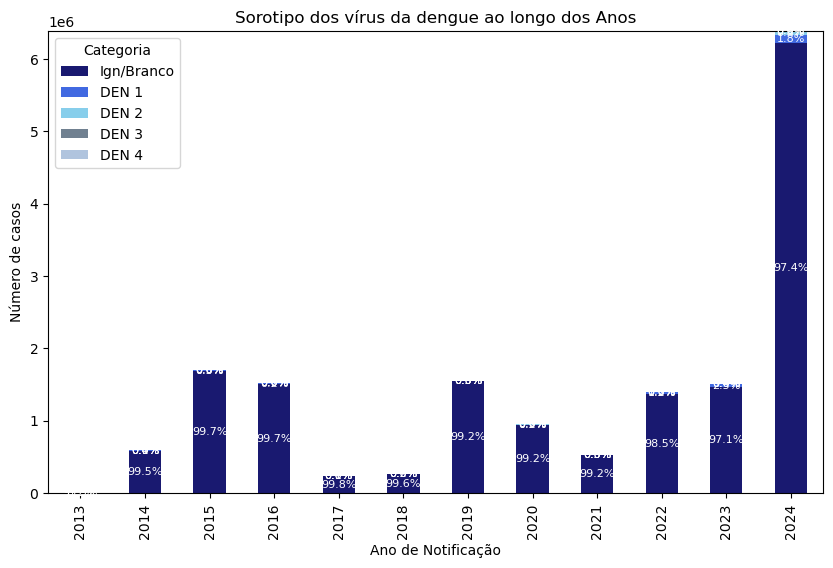

In [24]:
dados_agrupados = dengue_sorotipo_por_ano.groupby('Ano notificação').sum()
total_por_ano = dados_agrupados.sum(axis=1)

ax = dados_agrupados.plot(kind='bar', stacked=True, figsize=(10, 6))

plt.title('Sorotipo dos vírus da dengue ao longo dos Anos')
plt.xlabel('Ano de Notificação')
plt.ylabel('Número de casos')
plt.legend(title='Categoria')

# Adiciona porcentagens
for container in ax.containers:
    for i, rect in enumerate(container):
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        
        if height > 0:  # Só adiciona label se houver valor
            percent = 100 * height / total_por_ano.iloc[i]
            ax.text(x + width/2., y + height/2., f'{percent:.1f}%',
                    ha='center', va='center', color='white', fontsize=8)

plt.show()

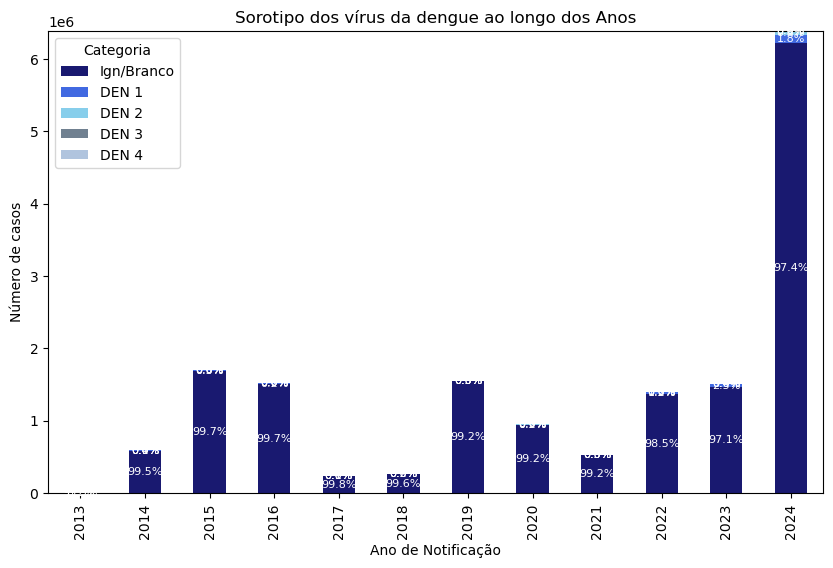

In [26]:
with PdfPages('dengue_sorotipo_por_ano.pdf') as pdf:
    ax = dados_agrupados.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Sorotipo dos vírus da dengue ao longo dos Anos')
    plt.xlabel('Ano de Notificação')
    plt.ylabel('Número de casos')
    plt.legend(title='Categoria')

    # Adiciona porcentagens
    for container in ax.containers:
        for i, rect in enumerate(container):
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()
        
            if height > 0:  # Só adiciona label se houver valor
                percent = 100 * height / total_por_ano.iloc[i]
                ax.text(x + width/2., y + height/2., f'{percent:.1f}%',
                        ha='center', va='center', color='white', fontsize=8)
    pdf.savefig()

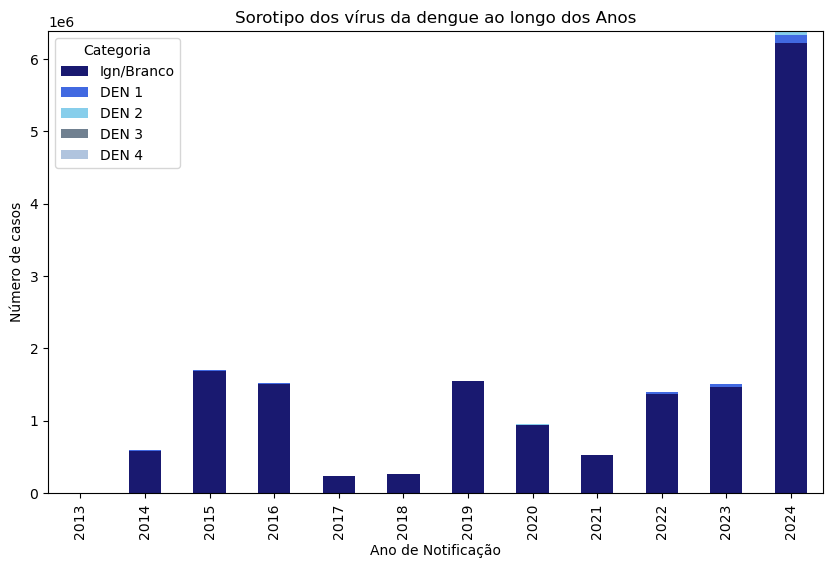

In [43]:
dengue_sorotipo_por_ano.groupby('Ano notificação').sum().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Sorotipo dos vírus da dengue ao longo dos Anos')
plt.xlabel('Ano de Notificação')
plt.ylabel('Número de casos')
plt.legend(title='Categoria')
plt.show()

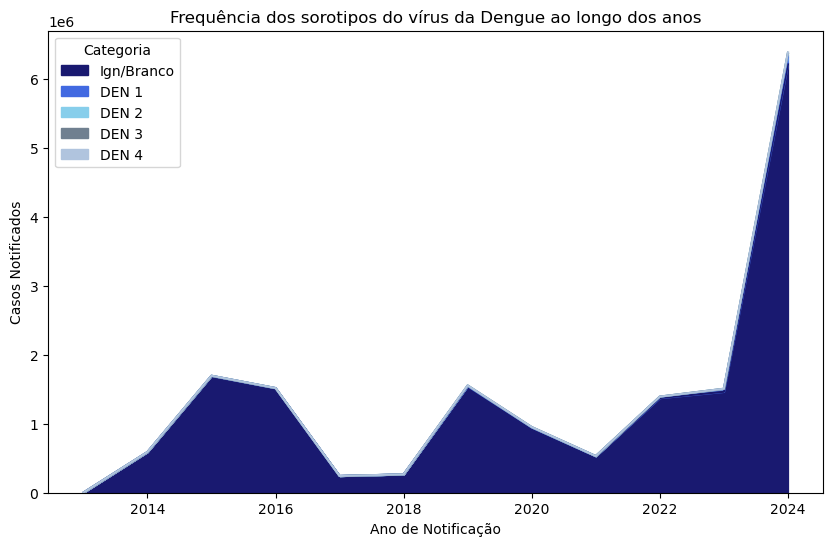

In [44]:
dengue_sorotipo_por_ano.groupby('Ano notificação').sum().plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Frequência dos sorotipos do vírus da Dengue ao longo dos anos')
plt.xlabel('Ano de Notificação')
plt.ylabel('Casos Notificados')
plt.legend(title='Categoria')
plt.show()

DENGUE NÚMERO DE HOSPITALIZAÇÕES POR ANO

In [27]:
dengue_hospitalizacao_por_ano = pd.read_csv('dengue_hospitalizacao_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
dengue_hospitalizacao_por_ano.head()

,Ano notificação,Ign/Branco,Sim,Não,Total
0,2013,598,65,447,1110
1,2014,299990,19637,271501,591128
2,2015,930373,38328,729100,1697801
3,2016,834688,32265,651905,1518858
4,2017,110229,11599,121508,243336


In [28]:
# Removendo a linha 'Total'
dengue_hospitalizacao_por_ano.drop((12), inplace=True)

In [29]:
# Removendo a coluna 'Total'
dengue_hospitalizacao_por_ano.drop(columns=['Total'], inplace=True)

In [30]:
# Verificando os tipos de caada coluna
dengue_hospitalizacao_por_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Ano notificação  12 non-null     object
 1   Ign/Branco       12 non-null     int64 
 2   Sim              12 non-null     int64 
 3   Não              12 non-null     int64 
dtypes: int64(3), object(1)
memory usage: 516.0+ bytes


Como as colunas já estavam no formato inteiros, não foi necessário converter

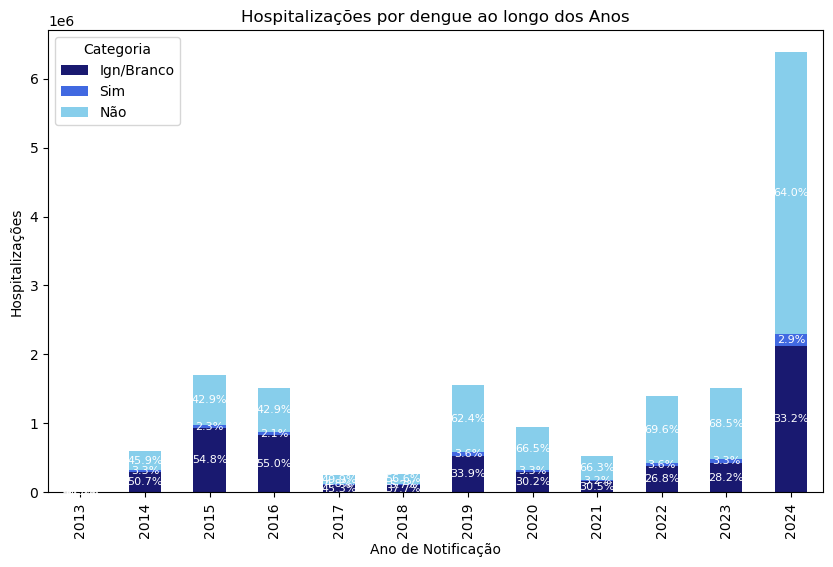

In [31]:
dados_agrupados_hosp = dengue_hospitalizacao_por_ano.groupby('Ano notificação').sum()
hosp_total_por_ano = dados_agrupados_hosp.sum(axis=1)

ax = dados_agrupados_hosp.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Hospitalizações por dengue ao longo dos Anos')
plt.xlabel('Ano de Notificação')
plt.ylabel('Hospitalizações')
plt.legend(title='Categoria')

# Adiciona porcentagens
for container in ax.containers:
    for i, rect in enumerate(container):
        height = rect.get_height()
        width = rect.get_width()
        x = rect.get_x()
        y = rect.get_y()
        
        if height > 0:  # Só adiciona label se houver valor
            percent = 100 * height / total_por_ano.iloc[i]
            ax.text(x + width/2., y + height/2., f'{percent:.1f}%',
                    ha='center', va='center', color='white', fontsize=8)

plt.show()

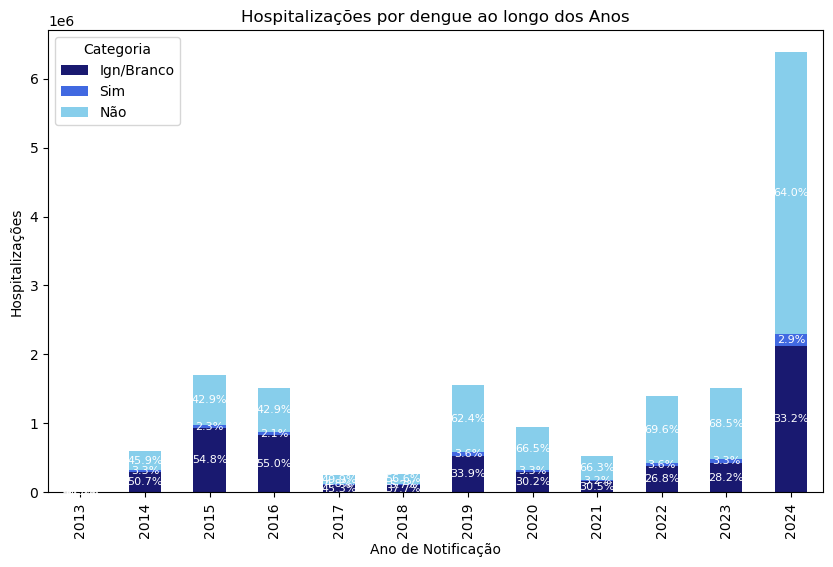

In [32]:
with PdfPages('dengue_hospitalizacao_por_ano.pdf') as pdf:
    ax = dados_agrupados_hosp.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title('Hospitalizações por dengue ao longo dos Anos')
    plt.xlabel('Ano de Notificação')
    plt.ylabel('Hospitalizações')
    plt.legend(title='Categoria')

    # Adiciona porcentagens
    for container in ax.containers:
        for i, rect in enumerate(container):
            height = rect.get_height()
            width = rect.get_width()
            x = rect.get_x()
            y = rect.get_y()
        
            if height > 0:  # Só adiciona label se houver valor
                percent = 100 * height / total_por_ano.iloc[i]
                ax.text(x + width/2., y + height/2., f'{percent:.1f}%',
                        ha='center', va='center', color='white', fontsize=8)
    pdf.savefig()

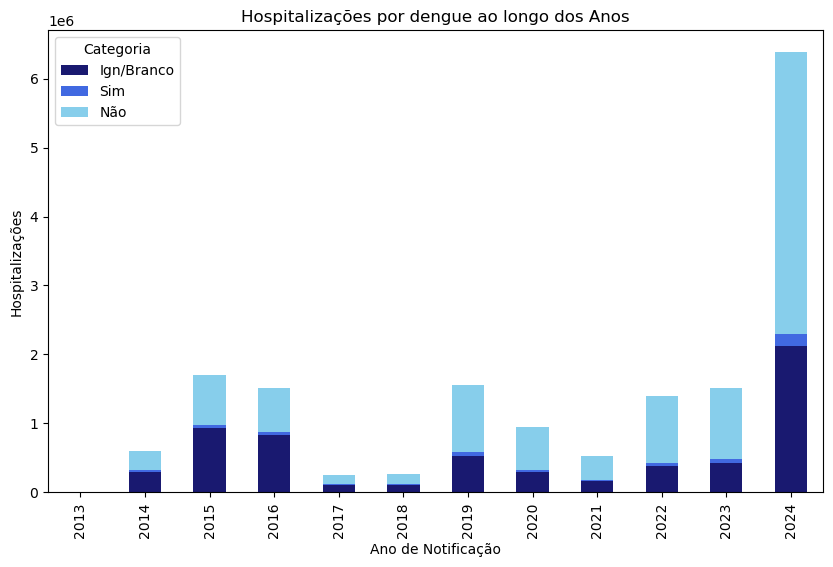

In [41]:
dengue_hospitalizacao_por_ano.groupby('Ano notificação').sum().plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Hospitalizações por dengue ao longo dos Anos')
plt.xlabel('Ano de Notificação')
plt.ylabel('Hospitalizações')
plt.legend(title='Categoria')
plt.show()

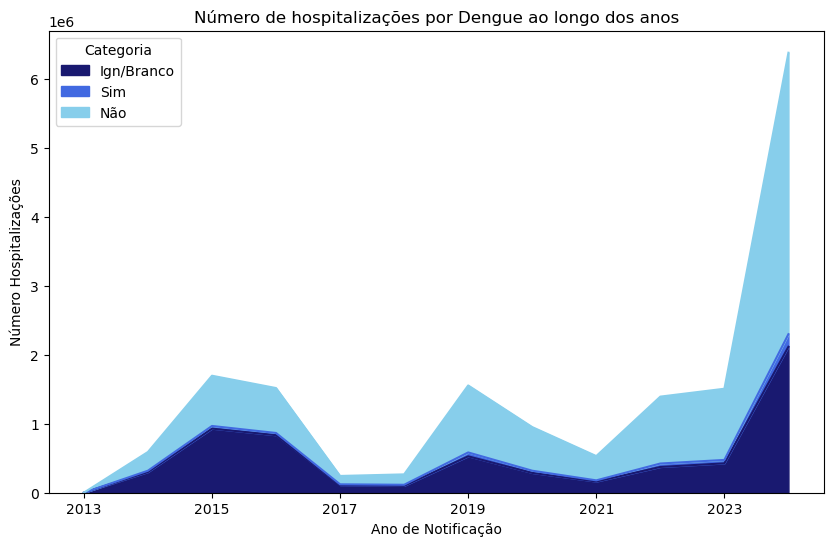

In [42]:
dengue_hospitalizacao_por_ano.groupby('Ano notificação').sum().plot(kind='area', stacked=True, figsize=(10, 6))
plt.title('Número de hospitalizações por Dengue ao longo dos anos')
plt.xlabel('Ano de Notificação')
plt.ylabel('Número Hospitalizações')
plt.legend(title='Categoria')
plt.show()

CASOS POR ANO

In [47]:
dengue_casos_por_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   UF de notificação  27 non-null     object
 1   2013               27 non-null     int32 
 2   2014               27 non-null     int32 
 3   2015               27 non-null     int32 
 4   2016               27 non-null     int64 
 5   2017               27 non-null     int32 
 6   2018               27 non-null     int32 
 7   2019               27 non-null     int32 
 8   2020               27 non-null     int32 
 9   2021               27 non-null     int32 
 10  2022               27 non-null     int32 
 11  2023               27 non-null     int32 
 12  2024               27 non-null     int32 
dtypes: int32(11), int64(1), object(1)
memory usage: 1.7+ KB


In [44]:
colunas_converter = ['2013', '2014', '2015', '2017', '2018', '2019', '2020', '2021', '2022', '2023', '2024']
dengue_casos_por_ano[colunas_converter] = dengue_casos_por_ano[colunas_converter].apply(pd.to_numeric, errors='coerce').fillna(0)

In [45]:
# Convertendo as colunas para inteiros
dengue_casos_por_ano[colunas_converter] = dengue_casos_por_ano[colunas_converter].astype(int)

In [46]:
# removendo parte númerica da coluna uf de notificação
dengue_casos_por_ano['UF de notificação'] = dengue_casos_por_ano['UF de notificação'].str.replace(r'^\d+\s*', '', regex=True)
dengue_casos_por_ano.head()

,UF de notificação,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,Rondônia,20,1994,2250,7916,2196,537,990,3957,2293,14260,10700,4991
1,Acre,13,28464,6067,2252,1885,7337,10192,7731,15004,3518,7190,4309
2,Amazonas,30,6318,3662,7516,3902,2322,3986,6052,8274,5359,6269,8065
3,Roraima,10,1128,1110,210,284,111,1605,493,111,62,224,580
4,Pará,21,4540,7853,10883,7827,3778,5395,3538,5078,5916,5688,19696


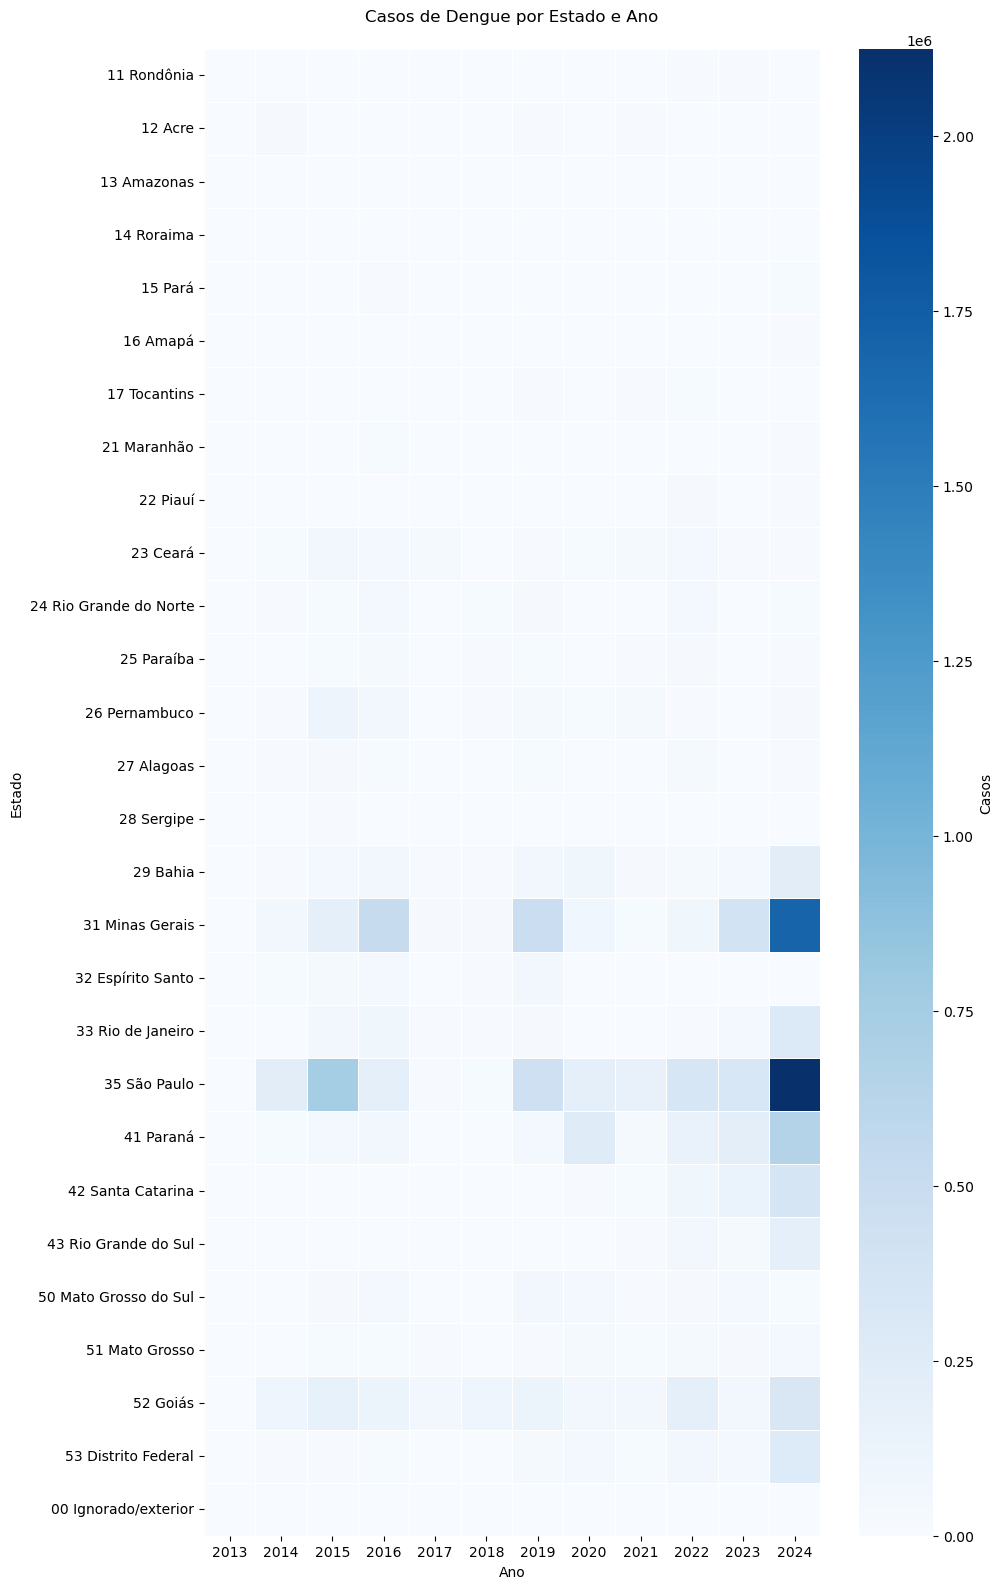

In [ ]:
# Heatmap
plt.figure(figsize=(10, 16))
sns.heatmap(dengue_casos_por_ano.set_index('UF de notificação'), fmt='.0f', cmap='Blues', 
            linewidths=0.5, cbar_kws={'label': 'Casos'})
plt.title('Casos de Dengue por Estado e Ano', pad=20)
plt.xlabel('Ano')
plt.ylabel('Estado')
plt.tight_layout()

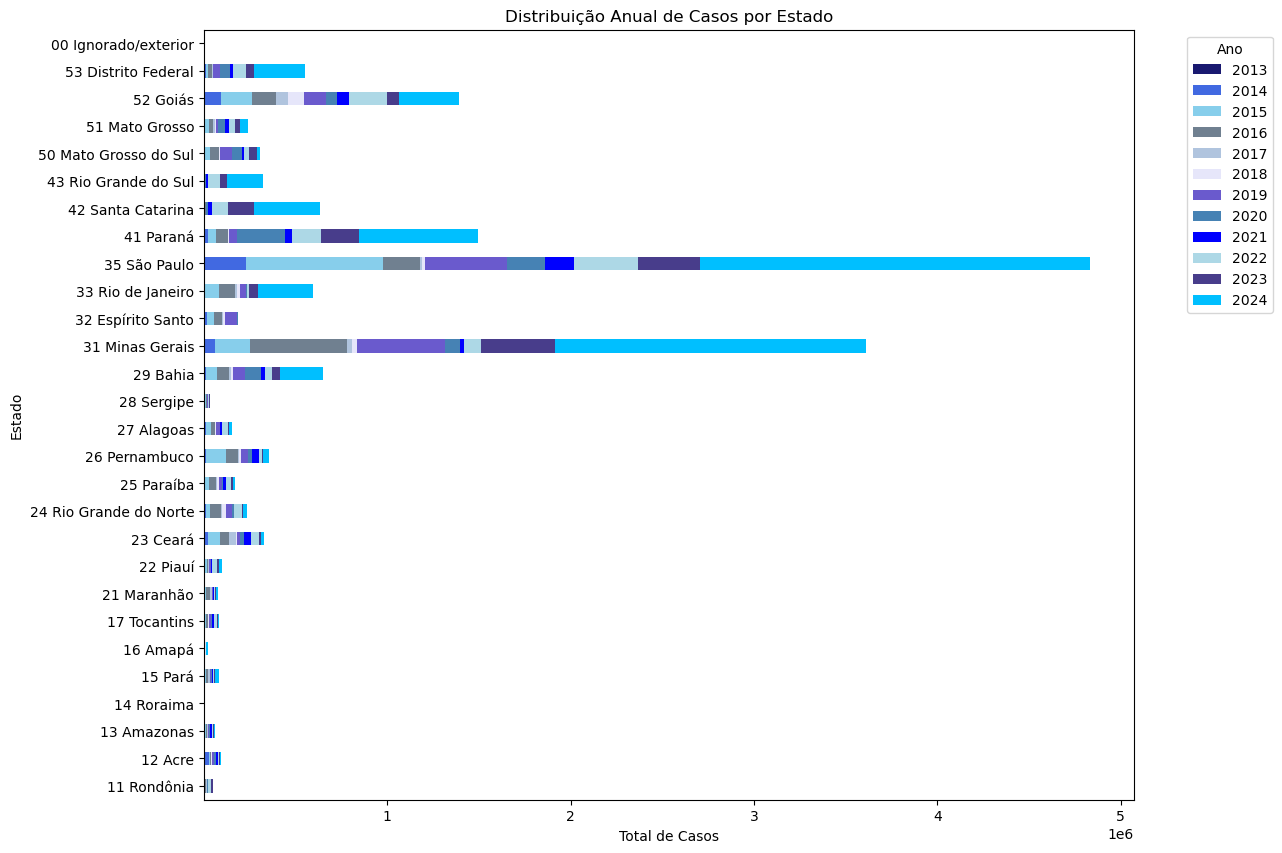

In [59]:
dengue_casos_por_ano.set_index('UF de notificação').plot(kind='barh', stacked=True, figsize=(12, 10))
plt.title('Distribuição Anual de Casos por Estado')
plt.xlabel('Total de Casos')
plt.ylabel('Estado')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1))

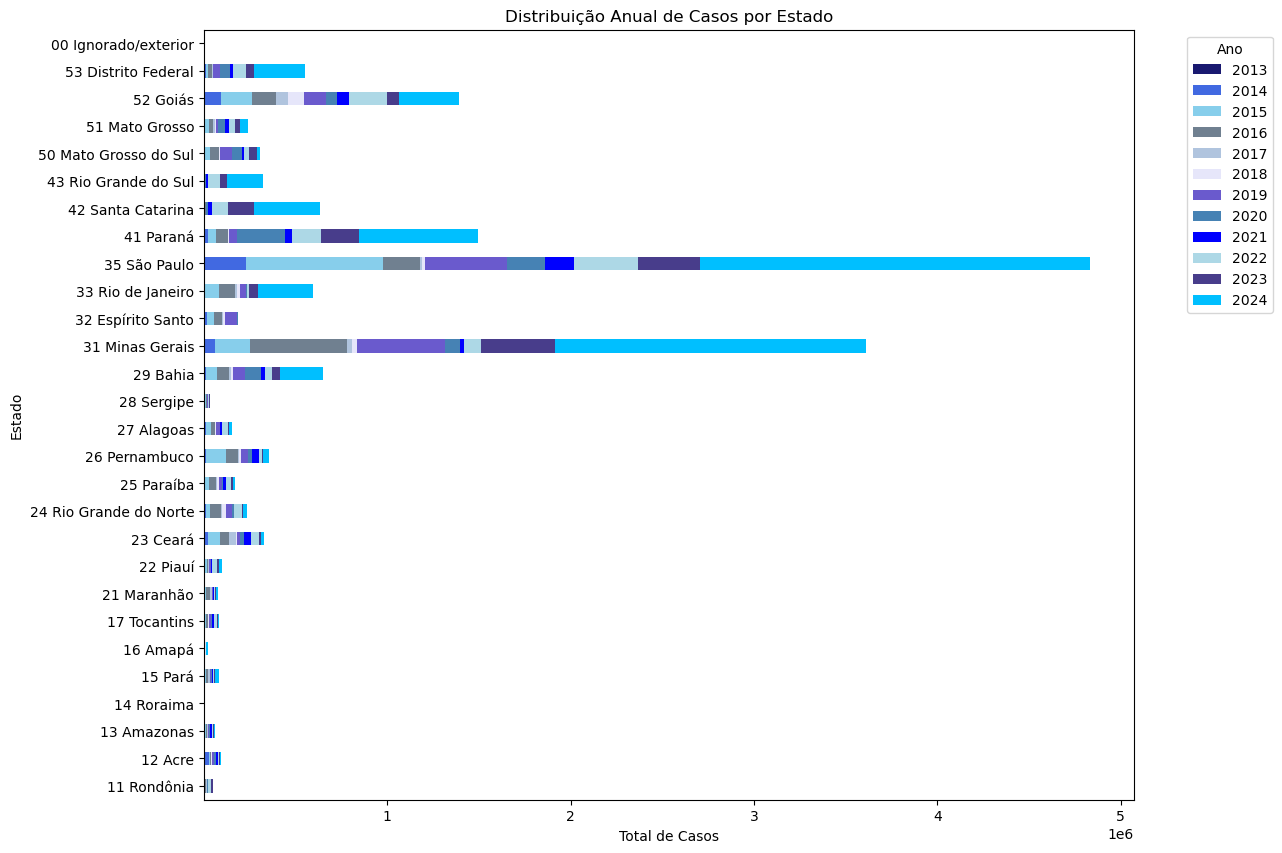

In [60]:
with PdfPages('dengue_casos_por_ano.pdf') as pdf:
    dengue_casos_por_ano.set_index('UF de notificação').plot(kind='barh', stacked=True, figsize=(12, 10))
    plt.title('Distribuição Anual de Casos por Estado')
    plt.xlabel('Total de Casos')
    plt.ylabel('Estado')
    plt.legend(title='Ano', bbox_to_anchor=(1.05, 1))
    pdf.savefig()

In [ ]:
# Gerando uma tabela excel de casos por ano
tabela_casos_dengue = pd.read_csv('dengue_casos_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
tabela_casos_dengue.head()

In [ ]:
tabela_casos_dengue.to_excel('planilha_casos_dengue.xlsx')

DENGUE CRITÉRIO DE CONFIRMAÇÃO

In [33]:
dengue_criterio_por_ano = pd.read_csv('dengue_criterio_confirmacao_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
dengue_criterio_por_ano.head()

,Ano notificação,Ign/Branco,Laboratórial,Clínico-epidemiológico,Em investigação,Total
0,2013,315,269,505,21,1110
1,2014,85880,229507,269846,5895,591128
2,2015,296006,534148,840315,27332,1697801
3,2016,399558,327415,772934,18951,1518858
4,2017,72617,43329,121697,5693,243336


In [34]:
dengue_criterio_uf = pd.read_csv('dengue_criterio_confirmacao_2014-2024.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
dengue_criterio_uf.head()

,UF de notificação,Ign/Branco,Laboratórial,Clínico-epidemiológico,Em investigação,Total
0,11 Rondônia,5919,32063,13069,1053,52104
1,12 Acre,9734,25478,57927,823,93962
2,13 Amazonas,16830,25506,16254,3165,61755
3,14 Roraima,570,2685,2513,160,5928
4,15 Pará,24131,25897,29268,917,80213


In [35]:
# removendo parte númerica da coluna uf de notificação
dengue_criterio_uf['UF de notificação'] = dengue_criterio_uf['UF de notificação'].str.replace(r'^\d+\s*', '', regex=True)
dengue_criterio_uf.head()

,UF de notificação,Ign/Branco,Laboratórial,Clínico-epidemiológico,Em investigação,Total
0,Rondônia,5919,32063,13069,1053,52104
1,Acre,9734,25478,57927,823,93962
2,Amazonas,16830,25506,16254,3165,61755
3,Roraima,570,2685,2513,160,5928
4,Pará,24131,25897,29268,917,80213


In [36]:
# Removendo a linha 'Total'
dengue_criterio_por_ano.drop((12), inplace=True)
dengue_criterio_uf.drop((28), inplace=True)
# Removendo a coluna 'Total'
dengue_criterio_por_ano.drop(columns=['Total'], inplace=True)
dengue_criterio_uf.drop(columns=['Total'], inplace=True)


In [37]:
# Removendo coluna Ignorado/exterior
dengue_criterio_uf.drop((27), inplace=True)

In [38]:
dengue_criterio_por_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Ano notificação         12 non-null     object
 1   Ign/Branco              12 non-null     int64 
 2   Laboratórial            12 non-null     int64 
 3   Clínico-epidemiológico  12 non-null     int64 
 4   Em investigação         12 non-null     int64 
dtypes: int64(4), object(1)
memory usage: 612.0+ bytes


In [39]:
dengue_criterio_uf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   UF de notificação       27 non-null     object
 1   Ign/Branco              27 non-null     object
 2   Laboratórial            27 non-null     int64 
 3   Clínico-epidemiológico  27 non-null     int64 
 4   Em investigação         27 non-null     object
dtypes: int64(2), object(3)
memory usage: 1.2+ KB


In [40]:
colunas_converter2 = ['Ign/Branco', 'Em investigação']
dengue_criterio_uf[colunas_converter2] = dengue_criterio_uf[colunas_converter2].apply(pd.to_numeric, errors='coerce').fillna(0)
# Convertendo as colunas para inteiros
dengue_criterio_uf[colunas_converter2] = dengue_criterio_uf[colunas_converter2].astype(int)

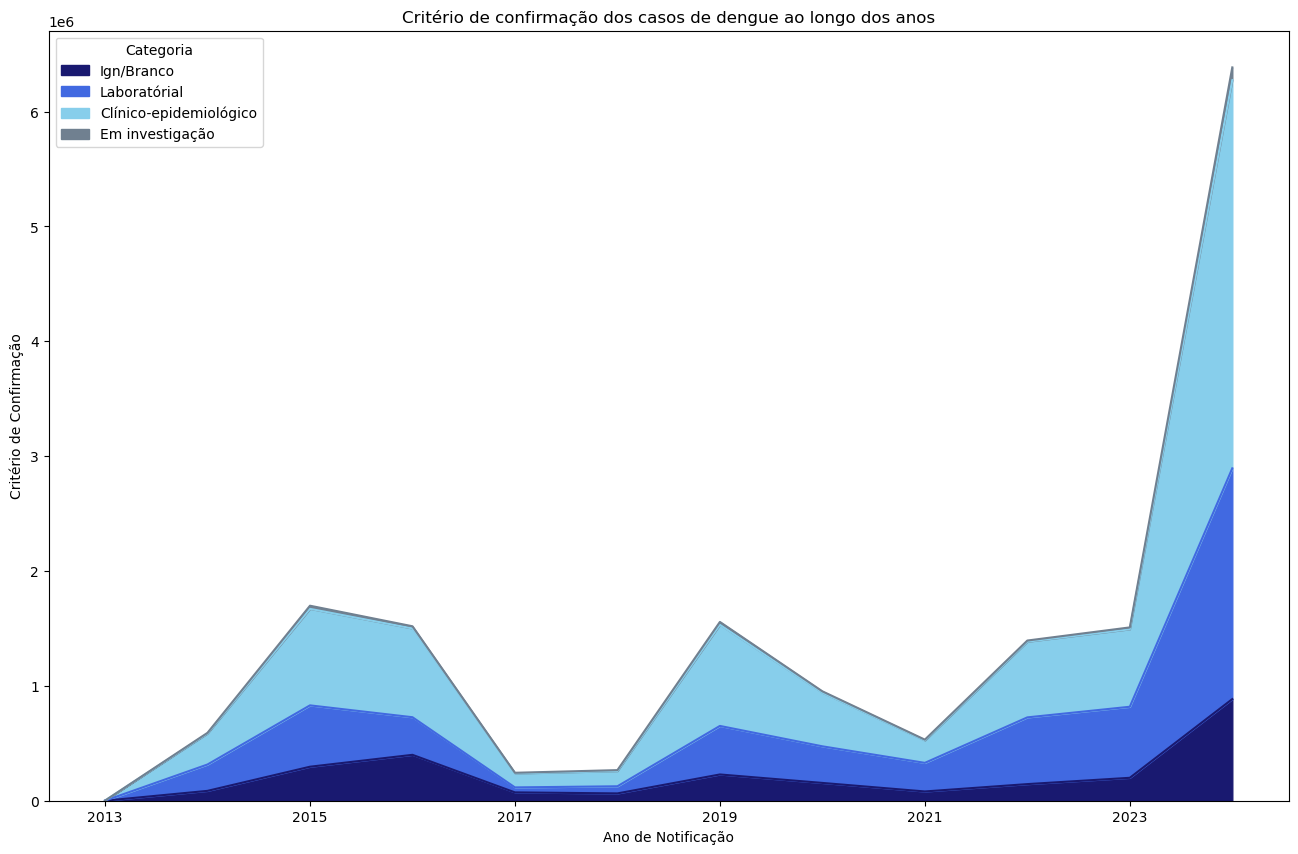

In [41]:
dengue_criterio_por_ano.groupby('Ano notificação').sum().plot(kind='area', figsize=(16, 10))
plt.title('Critério de confirmação dos casos de dengue ao longo dos anos')
plt.xlabel('Ano de Notificação')
plt.ylabel('Critério de Confirmação')
plt.legend(title='Categoria')
plt.show()

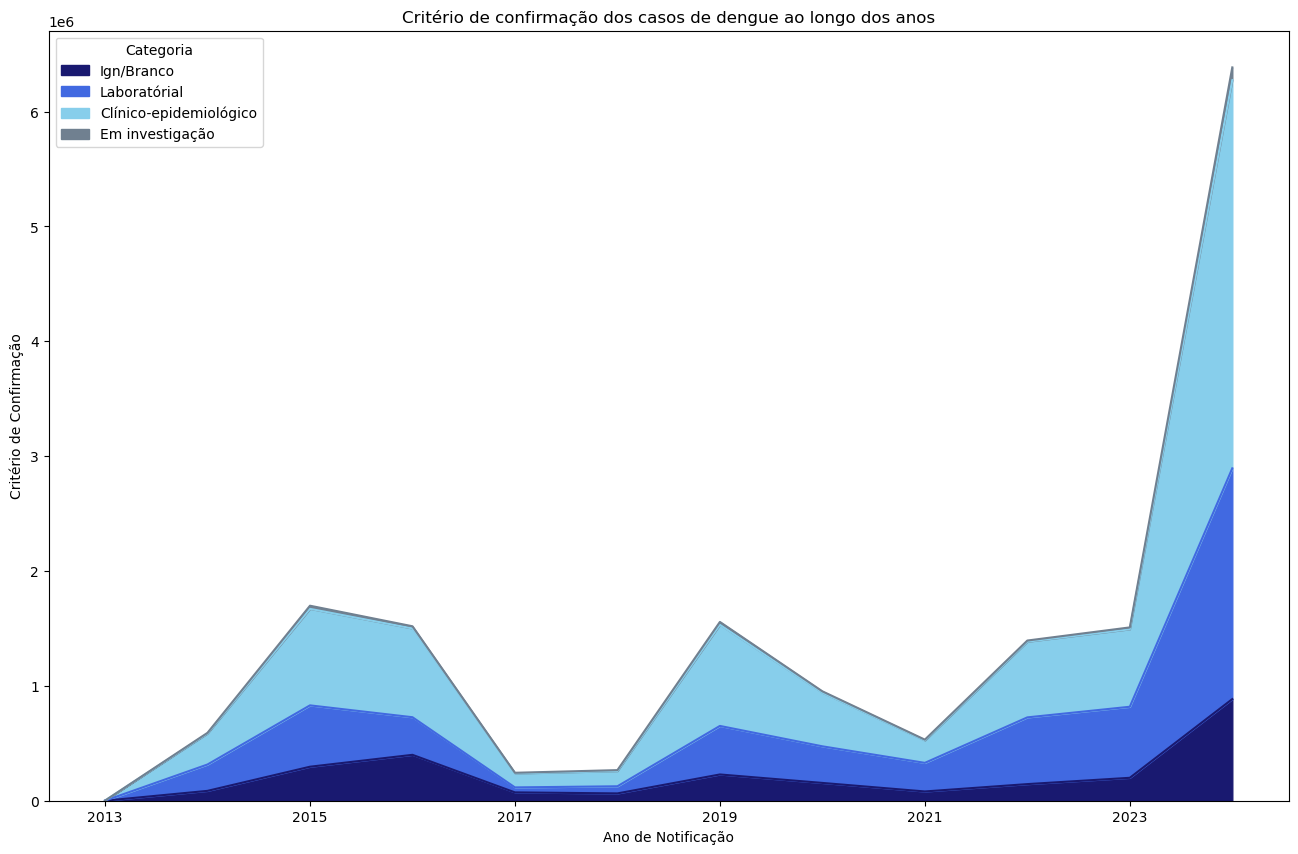

In [42]:
with PdfPages('dengue_criterio_tendencia.pdf') as pdf:
    dengue_criterio_por_ano.groupby('Ano notificação').sum().plot(kind='area', figsize=(16, 10))
    plt.title('Critério de confirmação dos casos de dengue ao longo dos anos')
    plt.xlabel('Ano de Notificação')
    plt.ylabel('Critério de Confirmação')
    plt.legend(title='Categoria')
    pdf.savefig()

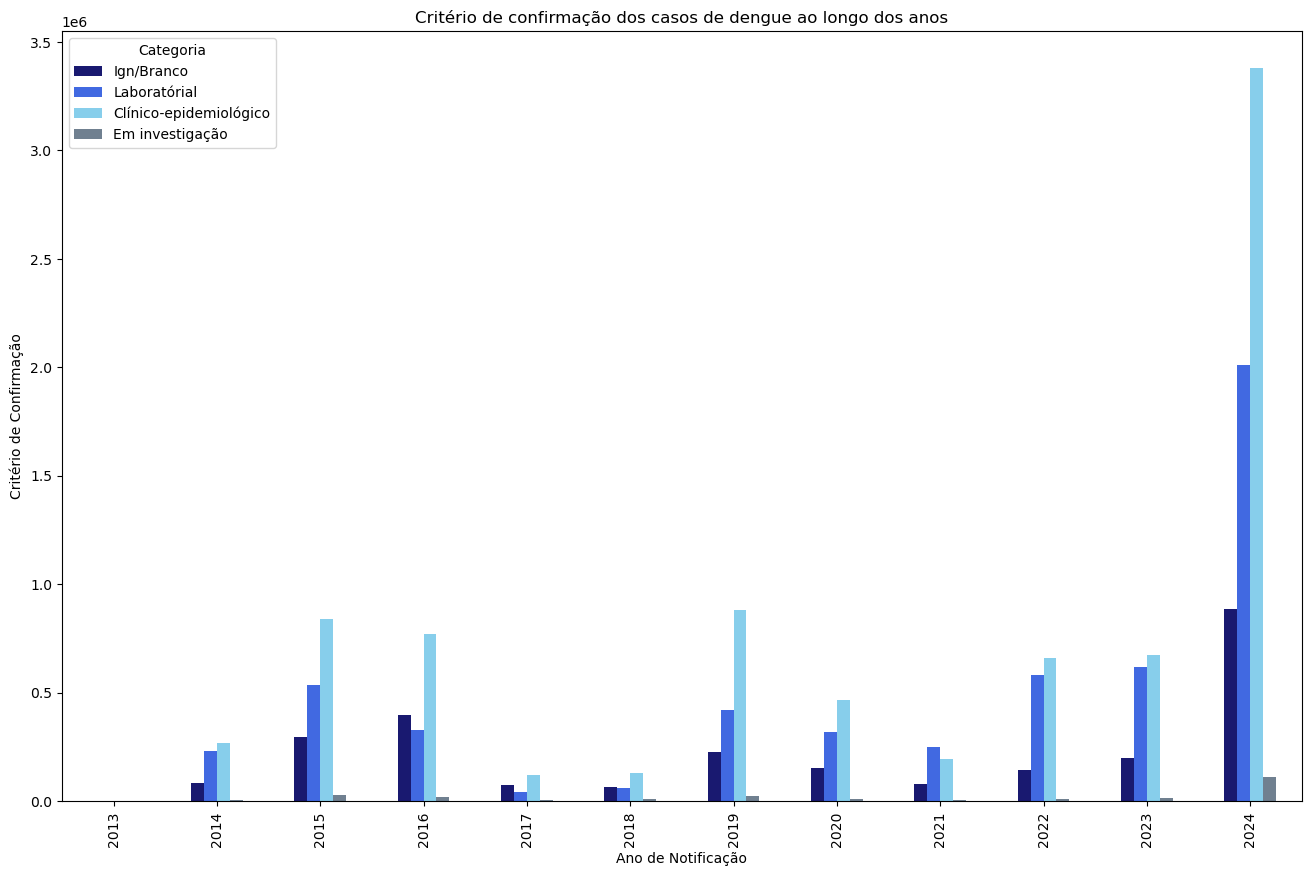

In [78]:
dengue_criterio_por_ano.groupby('Ano notificação').sum().plot(kind='bar', figsize=(16, 10))
plt.title('Critério de confirmação dos casos de dengue ao longo dos anos')
plt.xlabel('Ano de Notificação')
plt.ylabel('Critério de Confirmação')
plt.legend(title='Categoria')
plt.show()

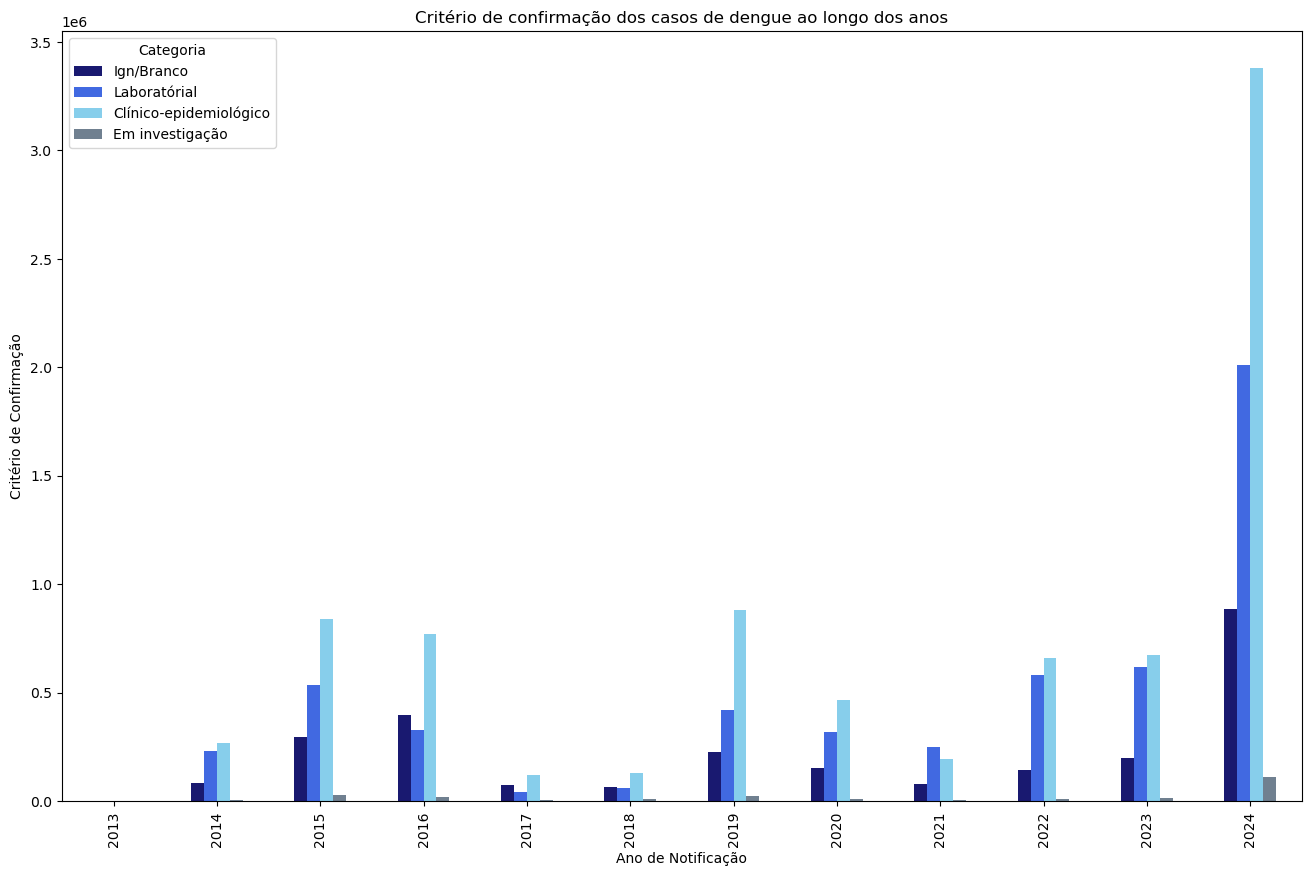

In [92]:
with PdfPages('dengue_criterio_por_ano.pdf') as pdf:
    dengue_criterio_por_ano.groupby('Ano notificação').sum().plot(kind='bar', figsize=(16, 10))
    plt.title('Critério de confirmação dos casos de dengue ao longo dos anos')
    plt.xlabel('Ano de Notificação')
    plt.ylabel('Critério de Confirmação')
    plt.legend(title='Categoria')
    pdf.savefig()

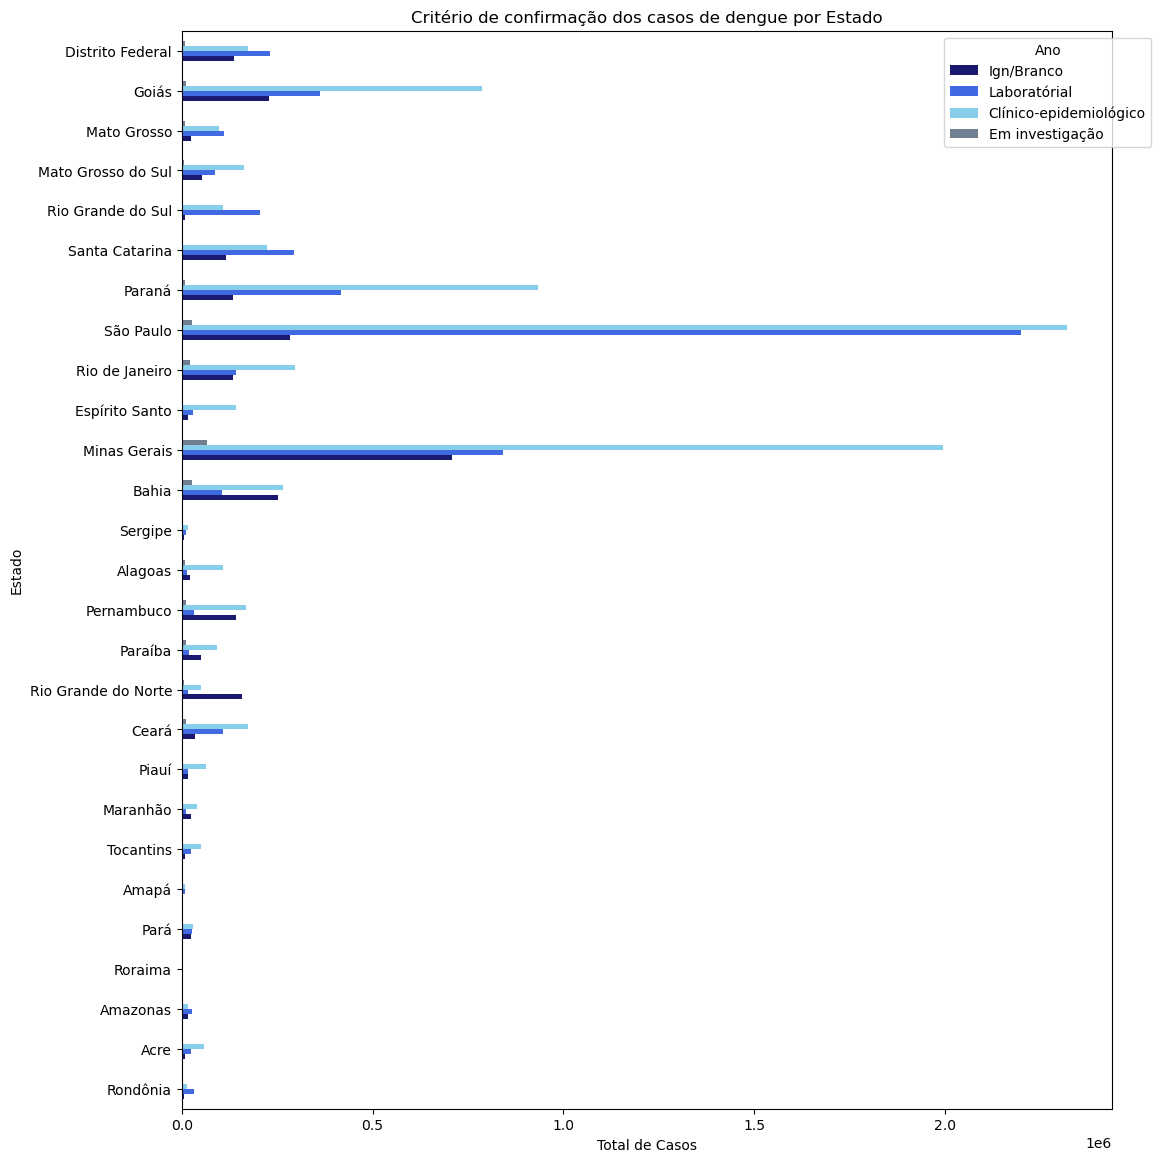

In [89]:
dengue_criterio_uf.set_index('UF de notificação').plot(kind='barh', figsize=(12, 14))
plt.title('Critério de confirmação dos casos de dengue por Estado')
plt.xlabel('Total de Casos')
plt.ylabel('Estado')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1))

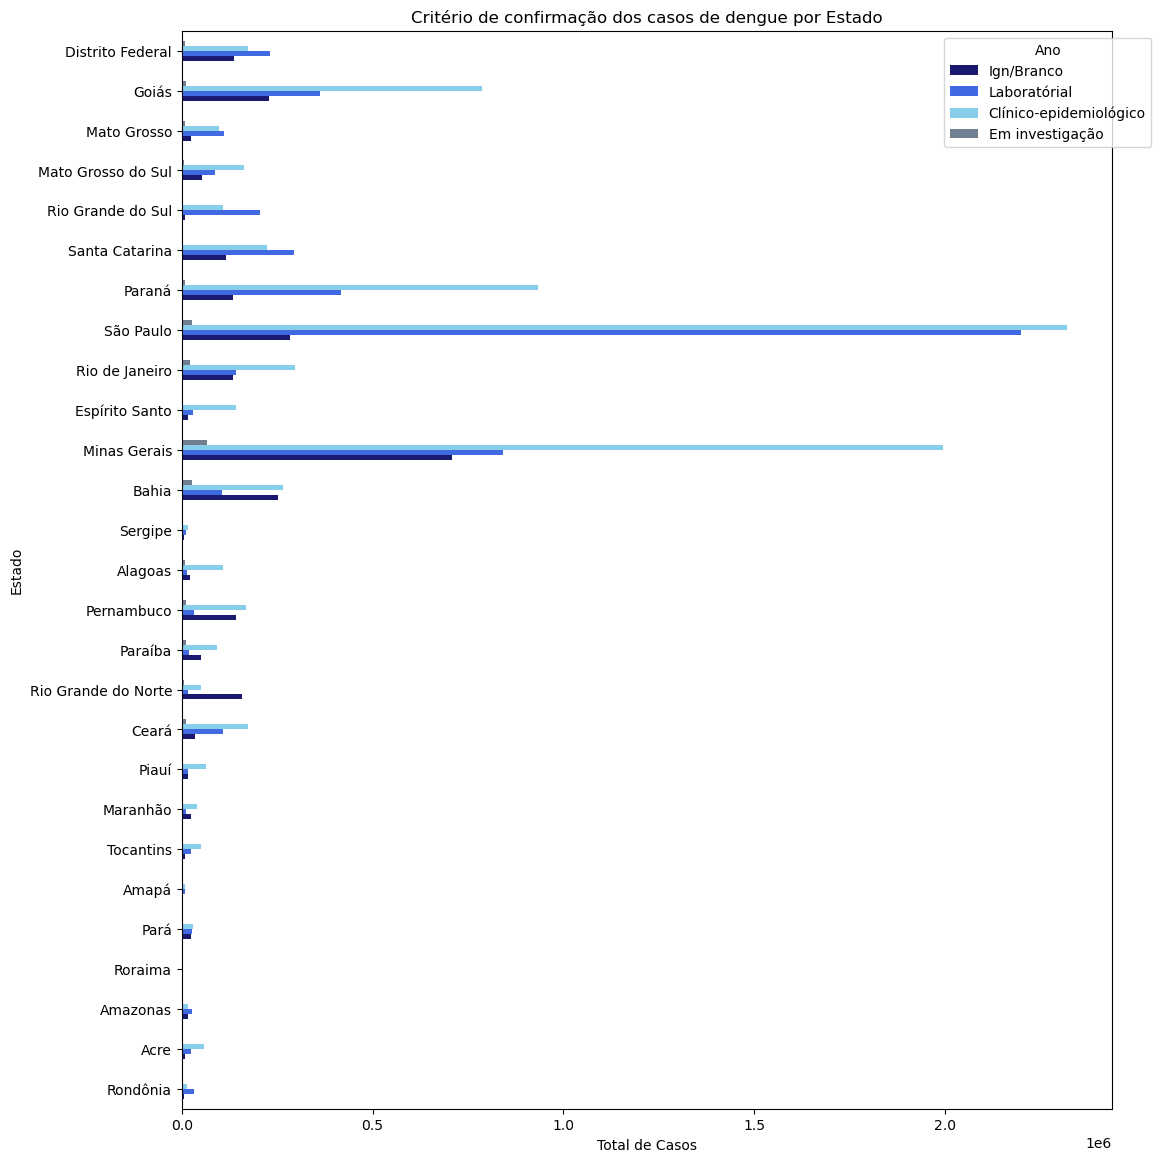

In [90]:
with PdfPages('dengue_criterio_uf.pdf') as pdf:
    dengue_criterio_uf.set_index('UF de notificação').plot(kind='barh', figsize=(12, 14))
    plt.title('Critério de confirmação dos casos de dengue por Estado')
    plt.xlabel('Total de Casos')
    plt.ylabel('Estado')
    plt.legend(title='Ano', bbox_to_anchor=(1.05, 1))
    pdf.savefig()

DENGUE CLASSIFICAÇÃO FINAL

In [93]:
dengue_classificacao = pd.read_csv('dengue_classificacao_final_2014-2024.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
dengue_classificacao.head()

,UF de notificação,Ign/Branco,Dengue Clássico,Dengue com complicações,Febre Hemorrágica do Dengue,Síndrome do Choque do Dengue,Inconclusivo,Dengue,Dengue com sinais de alarme,Dengue grave,Total
0,11 Rondônia,119,323,1,1,-,6824,44212,558,66,52104
1,12 Acre,371,135,-,-,-,9797,83102,525,32,93962
2,13 Amazonas,490,671,-,-,-,18882,41328,308,76,61755
3,14 Roraima,117,52,1,-,-,601,5064,81,12,5928
4,15 Pará,946,3709,6,2,1,24147,50768,557,77,80213


In [97]:
# Removendo a linha 'Total'
dengue_classificacao.drop(([27, 28]), inplace=True)
# Removendo a coluna 'Total'
dengue_classificacao.drop(columns=['Total'], inplace=True)


In [98]:
# removendo parte númerica da coluna uf de notificação
dengue_classificacao['UF de notificação'] = dengue_classificacao['UF de notificação'].str.replace(r'^\d+\s*', '', regex=True)
dengue_classificacao.head()

,UF de notificação,Ign/Branco,Dengue Clássico,Dengue com complicações,Febre Hemorrágica do Dengue,Síndrome do Choque do Dengue,Inconclusivo,Dengue,Dengue com sinais de alarme,Dengue grave
0,Rondônia,119,323,1,1,-,6824,44212,558,66
1,Acre,371,135,-,-,-,9797,83102,525,32
2,Amazonas,490,671,-,-,-,18882,41328,308,76
3,Roraima,117,52,1,-,-,601,5064,81,12
4,Pará,946,3709,6,2,1,24147,50768,557,77


In [101]:
dengue_classificacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   UF de notificação             27 non-null     object
 1   Ign/Branco                    27 non-null     int32 
 2   Dengue Clássico               27 non-null     int32 
 3   Dengue com complicações       27 non-null     int32 
 4   Febre Hemorrágica do Dengue   27 non-null     int32 
 5   Síndrome do Choque do Dengue  27 non-null     int32 
 6   Inconclusivo                  27 non-null     int32 
 7   Dengue                        27 non-null     int32 
 8   Dengue com sinais de alarme   27 non-null     int32 
 9   Dengue grave                  27 non-null     int32 
dtypes: int32(9), object(1)
memory usage: 1.3+ KB


In [100]:
colunas_converter3 = ['Ign/Branco', 'Dengue Clássico', 'Dengue com complicações', 'Febre Hemorrágica do Dengue', 'Síndrome do Choque do Dengue', 'Inconclusivo', 'Dengue', 'Dengue com sinais de alarme', 'Dengue grave']
dengue_classificacao[colunas_converter3] = dengue_classificacao[colunas_converter3].apply(pd.to_numeric, errors='coerce').fillna(0)
# Convertendo as colunas para inteiros
dengue_classificacao[colunas_converter3] = dengue_classificacao[colunas_converter3].astype(int)

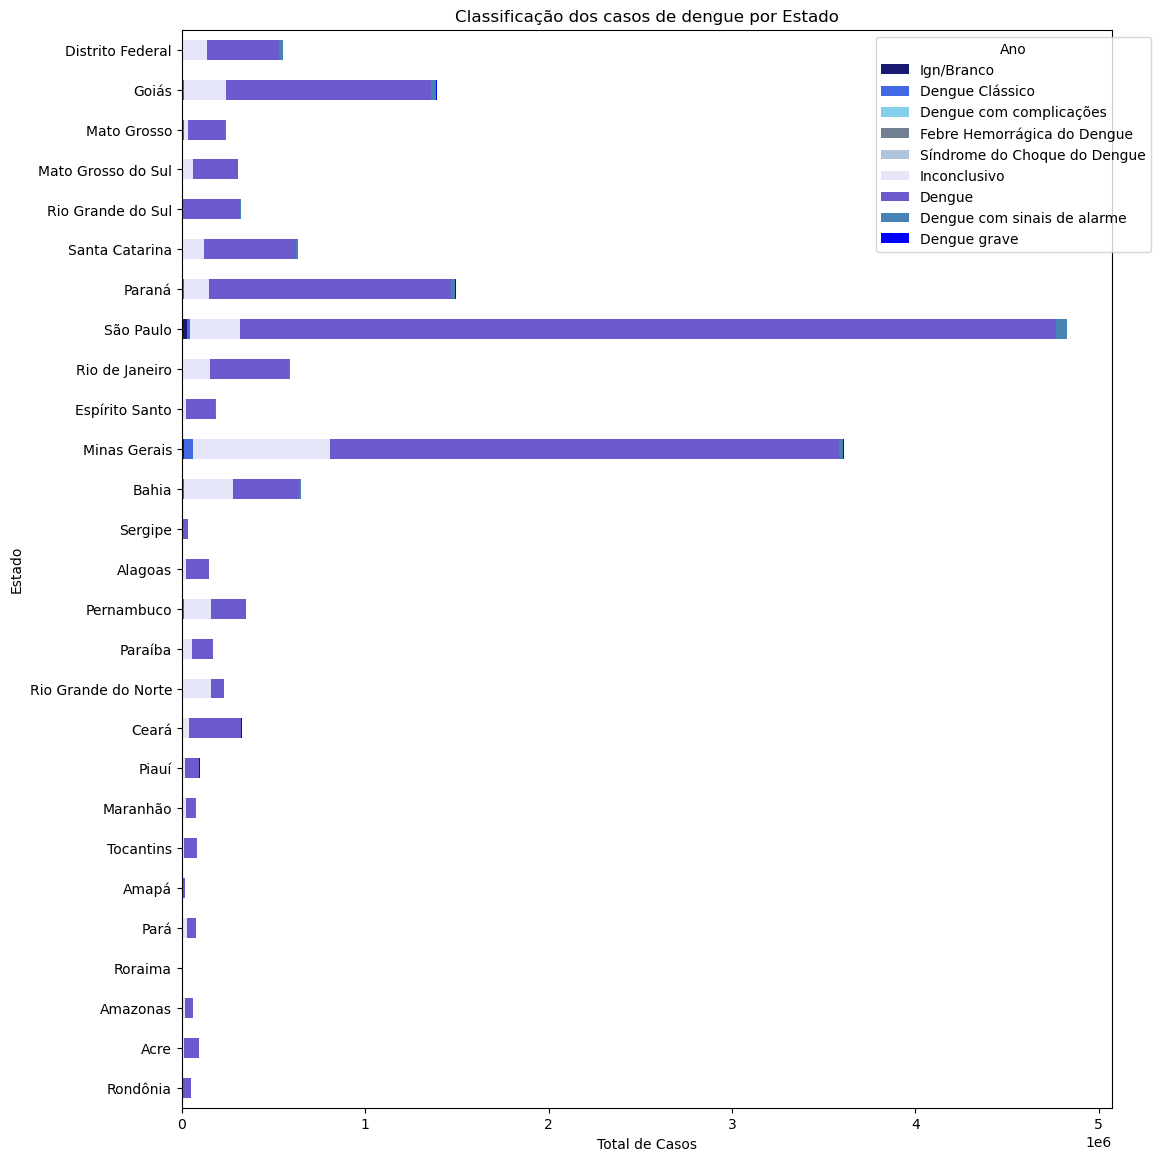

In [106]:
dengue_classificacao.set_index('UF de notificação').plot(kind='barh', stacked=True, figsize=(12, 14))
plt.title('Classificação dos casos de dengue por Estado')
plt.xlabel('Total de Casos')
plt.ylabel('Estado')
plt.legend(title='Ano', bbox_to_anchor=(1.05, 1))

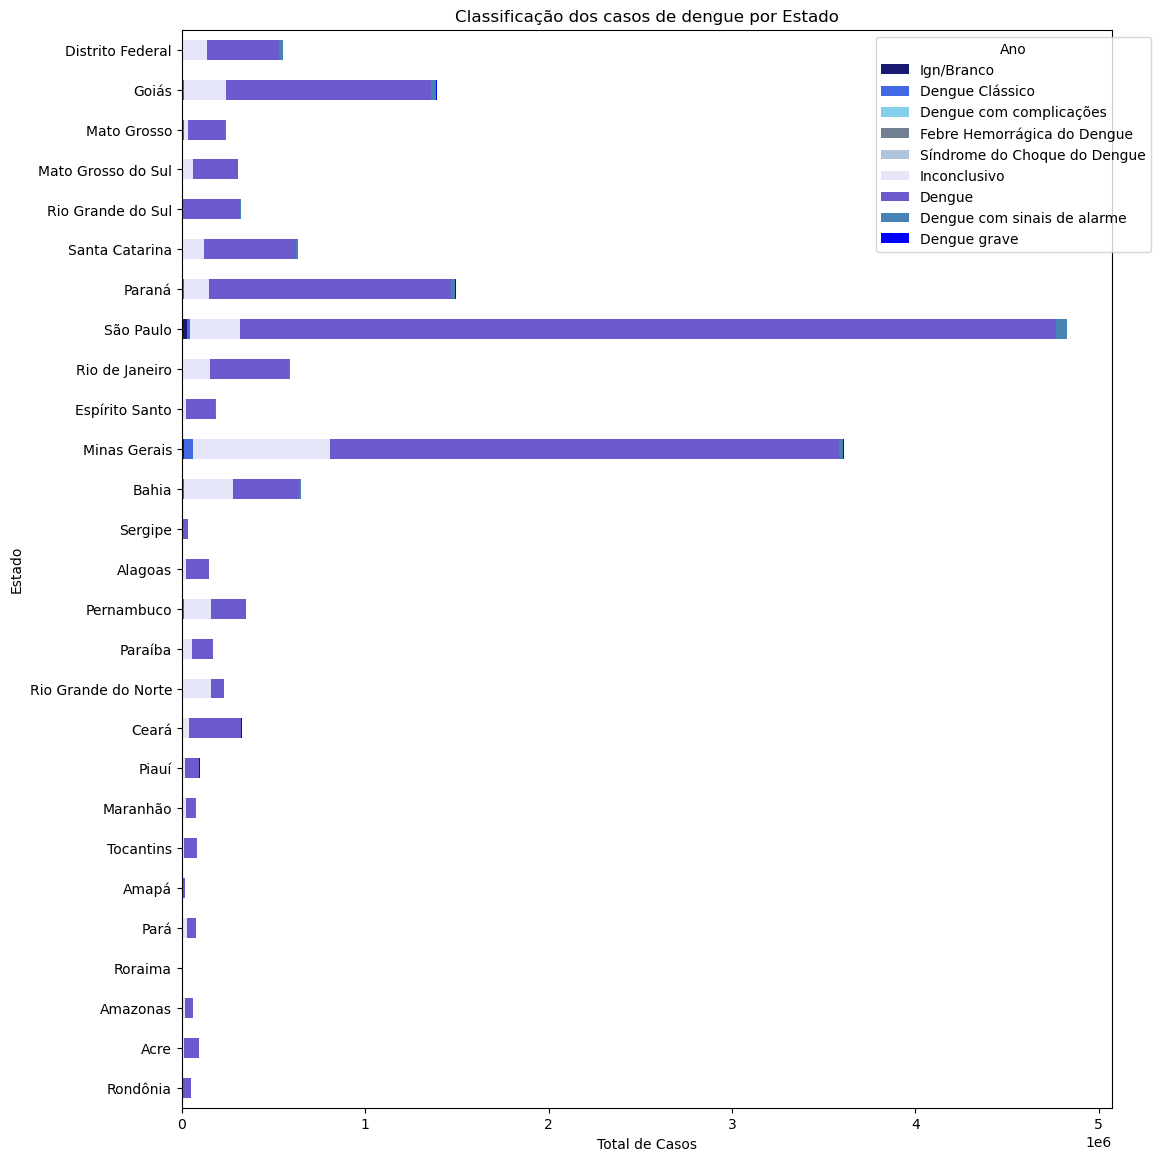

In [107]:
with PdfPages('dengue_classificacao.pdf') as pdf:
    dengue_classificacao.set_index('UF de notificação').plot(kind='barh', stacked=True, figsize=(12, 14))
    plt.title('Classificação dos casos de dengue por Estado')
    plt.xlabel('Total de Casos')
    plt.ylabel('Estado')
    plt.legend(title='Ano', bbox_to_anchor=(1.05, 1))
    pdf.savefig()

In [114]:
dengue_classificacao_por_ano = pd.read_csv('dengue_classificacao_por_ano.csv', sep=';', encoding='ISO-8859-1', engine='python', on_bad_lines='warn')
dengue_classificacao_por_ano.head()

,Ano notificação,Ign/Branco,Dengue Clássico,Dengue com complicações,Febre Hemorrágica do Dengue,Síndrome do Choque do Dengue,Inconclusivo,Dengue,Dengue com sinais de alarme,Dengue grave,Total
0,2013,24,616,5,2,-,306,155,1,1,1110
1,2014,887,45587,287,40,5,87506,447403,8620,793,591128
2,2015,206,65915,222,38,10,309194,1298457,21945,1814,1697801
3,2016,1333,36547,54,14,3,413528,1056641,9702,1036,1518858
4,2017,475,-,-,-,-,75202,164451,2864,344,243336


In [115]:
# Removendo a linha 'Total'
dengue_classificacao_por_ano.drop((12), inplace=True)
# Removendo a coluna 'Total'
dengue_classificacao_por_ano.drop(columns=['Total'], inplace=True)


In [118]:
dengue_classificacao_por_ano.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   Ano notificação               12 non-null     object
 1   Ign/Branco                    12 non-null     int32 
 2   Dengue Clássico               12 non-null     int32 
 3   Dengue com complicações       12 non-null     int32 
 4   Febre Hemorrágica do Dengue   12 non-null     int32 
 5   Síndrome do Choque do Dengue  12 non-null     int32 
 6   Inconclusivo                  12 non-null     int32 
 7   Dengue                        12 non-null     int32 
 8   Dengue com sinais de alarme   12 non-null     int32 
 9   Dengue grave                  12 non-null     int32 
dtypes: int32(9), object(1)
memory usage: 660.0+ bytes


In [117]:
colunas_converter4 = ['Ign/Branco', 'Dengue Clássico', 'Dengue com complicações', 'Febre Hemorrágica do Dengue',
                      'Síndrome do Choque do Dengue', 'Inconclusivo', 'Dengue', 'Dengue com sinais de alarme', 'Dengue grave']
dengue_classificacao_por_ano[colunas_converter4] = dengue_classificacao_por_ano[colunas_converter4].apply(pd.to_numeric, errors='coerce').fillna(0)
# Convertendo as colunas para inteiros
dengue_classificacao_por_ano[colunas_converter4] = dengue_classificacao_por_ano[colunas_converter4].astype(int)

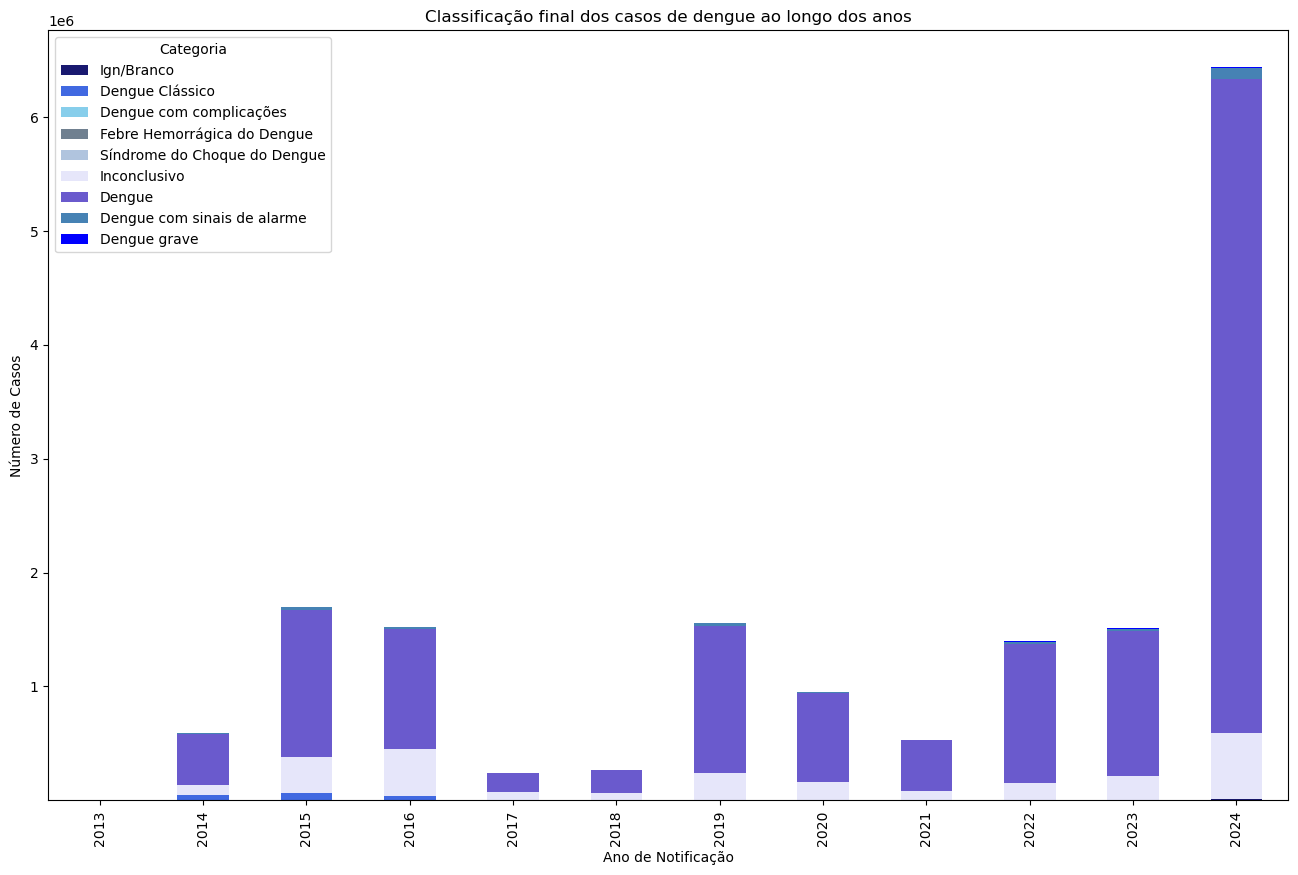

In [120]:
dengue_classificacao_por_ano.groupby('Ano notificação').sum().plot(kind='bar', stacked=True, figsize=(16, 10))
plt.title('Classificação final dos casos de dengue ao longo dos anos')
plt.xlabel('Ano de Notificação')
plt.ylabel('Número de Casos')
plt.legend(title='Categoria')
plt.show()

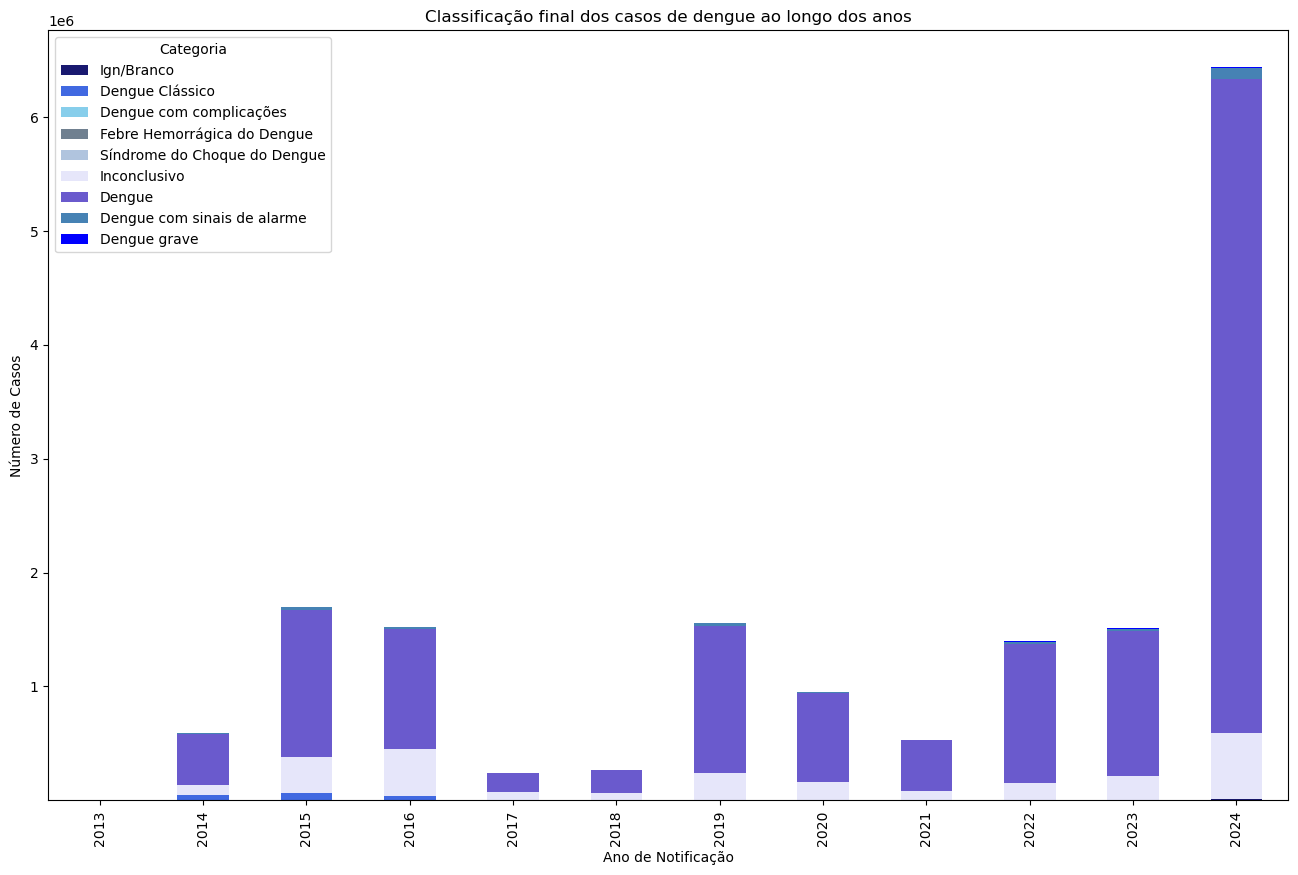

In [121]:
with PdfPages('dengue_classificacao_por_ano.pdf') as pdf:
    dengue_classificacao_por_ano.groupby('Ano notificação').sum().plot(kind='bar', stacked=True, figsize=(16, 10))
    plt.title('Classificação final dos casos de dengue ao longo dos anos')
    plt.xlabel('Ano de Notificação')
    plt.ylabel('Número de Casos')
    plt.legend(title='Categoria')
    pdf.savefig()

ANÁLISE DE CLUSTERS

In [ ]:
# PASSO 1: Selecionar apenas colunas numéricas
X1 = dengue_casos_por_ano.drop('UF de notificação', axis=1)  # Remove coluna de texto

# PASSO 2: Normalizar os dados (essencial para KMeans)
scaler1 = StandardScaler()
X1_scaled = scaler1.fit_transform(X1)

# PASSO 3: Clusterização
kmeans1 = KMeans(n_clusters=3, random_state=42, n_init=10)  # n_init resolve warnings
dengue_casos_por_ano['Cluster'] = kmeans1.fit_predict(X1_scaled)

# PASSO 4: Análise dos resultados
# Médias por cluster (apenas colunas numéricas)
print(dengue_casos_por_ano.groupby('Cluster').mean(numeric_only=True))

               2013           2014           2015           2016  \
Cluster                                                            
0         25.791667    8874.916667   24428.333333   27329.666667   
1        217.500000   75580.500000  180874.500000  329767.500000   
2         56.000000  226969.000000  749772.000000  203397.000000   

                 2017          2018           2019           2020  \
Cluster                                                             
0         5971.458333   5279.458333   21382.041667   25162.833333   
1        45276.500000  60532.500000  299519.500000   71055.000000   
2         9468.000000  18614.000000  444380.000000  206491.000000   

                  2021       2022           2023          2024  
Cluster                                                         
0         12079.166667   31153.25   28978.333333  9.341942e+04  
1         41692.000000  147935.00  238130.000000  1.009202e+06  
2        158527.000000  350984.00  337196.000000  2.1

c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


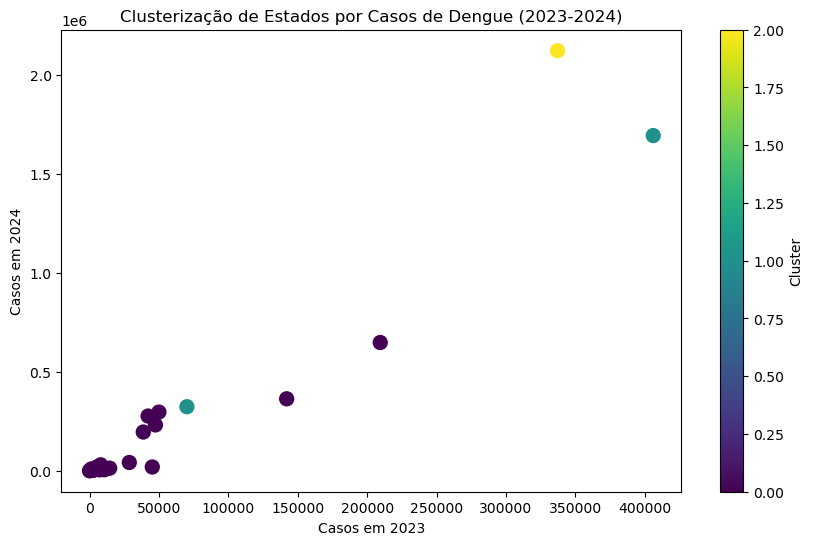

In [49]:
# Visualização (exemplo: 2023 vs 2024)
plt.figure(figsize=(10, 6))
plt.scatter(dengue_casos_por_ano['2023'], dengue_casos_por_ano['2024'], c=dengue_casos_por_ano['Cluster'], cmap='viridis', s=100)
plt.xlabel('Casos em 2023')
plt.ylabel('Casos em 2024')
plt.title('Clusterização de Estados por Casos de Dengue (2023-2024)')
plt.colorbar(label='Cluster')

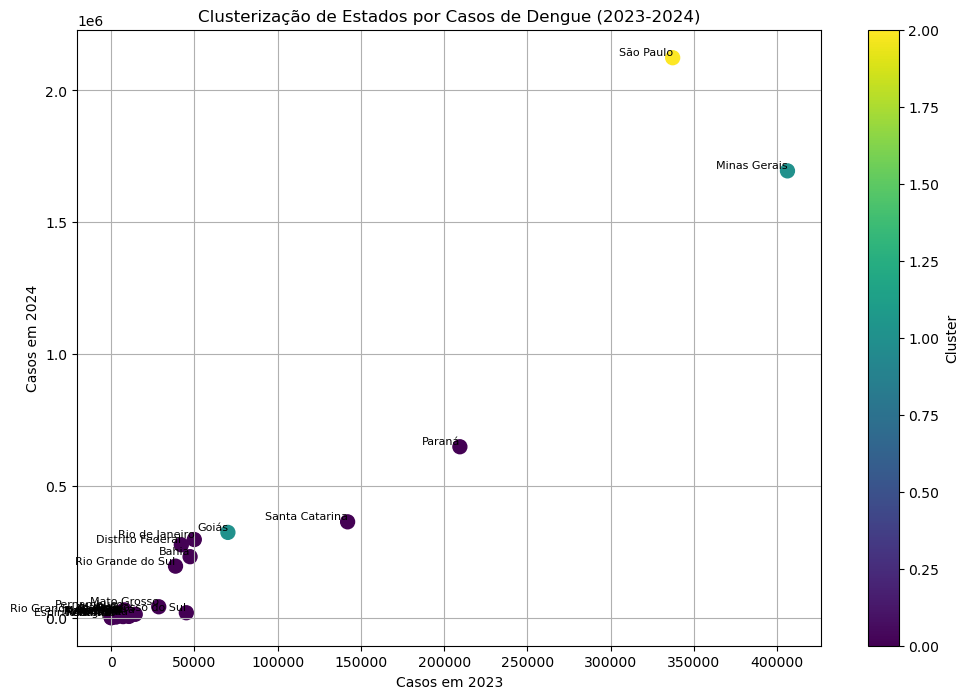

In [50]:
# Visualização (exemplo: 2023 vs 2024)
plt.figure(figsize=(12, 8))
plt.scatter(dengue_casos_por_ano['2023'], dengue_casos_por_ano['2024'], c=dengue_casos_por_ano['Cluster'], s=100)
plt.xlabel('Casos em 2023')
plt.ylabel('Casos em 2024')
plt.title('Clusterização de Estados por Casos de Dengue (2023-2024)')

# Adiciona rótulos dos estados
for i, row in dengue_casos_por_ano.iterrows():
    plt.text(row['2023'], row['2024'], row['UF de notificação'], 
             fontsize=8, ha='right', va='bottom')

plt.colorbar(label='Cluster')
plt.grid()
plt.show()

In [51]:
# Adicione o cluster ao DataFrame original
resultado = dengue_casos_por_ano.copy()

# Calcule médias por cluster (apenas para colunas numéricas)
print(resultado.groupby('Cluster').mean(numeric_only=True))

               2013           2014           2015           2016  \
Cluster                                                            
0         25.791667    8874.916667   24428.333333   27329.666667   
1        217.500000   75580.500000  180874.500000  329767.500000   
2         56.000000  226969.000000  749772.000000  203397.000000   

                 2017          2018           2019           2020  \
Cluster                                                             
0         5971.458333   5279.458333   21382.041667   25162.833333   
1        45276.500000  60532.500000  299519.500000   71055.000000   
2         9468.000000  18614.000000  444380.000000  206491.000000   

                  2021       2022           2023          2024  
Cluster                                                         
0         12079.166667   31153.25   28978.333333  9.341942e+04  
1         41692.000000  147935.00  238130.000000  1.009202e+06  
2        158527.000000  350984.00  337196.000000  2.1

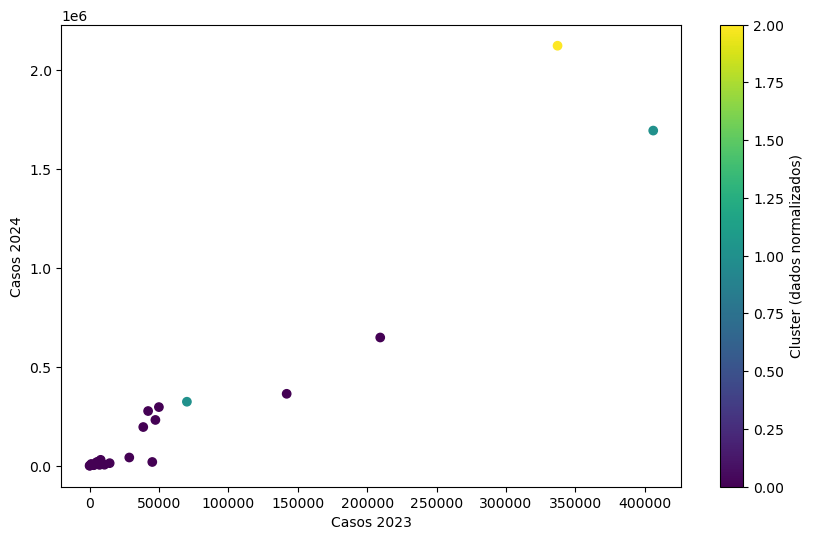

In [ ]:
# Visualização (exemplo para 2 anos)
plt.figure(figsize=(10, 6))
plt.scatter(resultado['2023'], resultado['2024'], c=resultado['Cluster'], cmap='viridis')
plt.xlabel('Casos 2023')
plt.ylabel('Casos 2024')
plt.colorbar(label="Cluster")
plt.show()

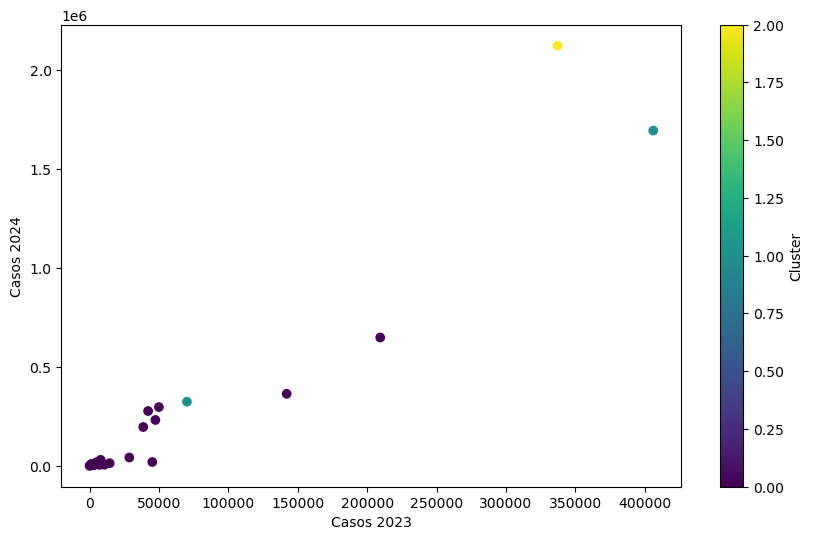

In [46]:
with PdfPages('k-means_cluster.pdf') as pdf:
    # Visualização (exemplo para 2 anos)
    plt.figure(figsize=(10, 6))
    plt.scatter(resultado['2023'], resultado['2024'], c=resultado['Cluster'], cmap='viridis')
    plt.xlabel('Casos 2023')
    plt.ylabel('Casos 2024')
    plt.colorbar(label="Cluster")
    pdf.savefig()

In [18]:
clusters_estados = resultado[['UF de notificação', 'Cluster']]

In [28]:
clusters_estados.to_excel('clusters_estados.xlsx')

ANÁLISE TEMPORAL

In [52]:
df_melt = resultado.melt(id_vars=['UF de notificação', 'Cluster'], 
                 var_name='Ano', 
                 value_name='Casos')

c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length

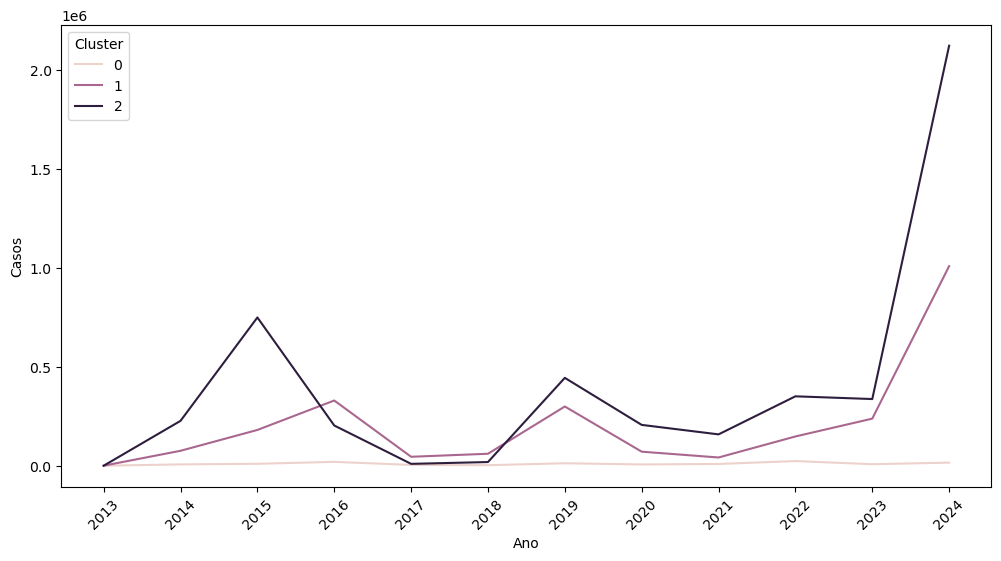

In [20]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_melt, x='Ano', y='Casos', hue='Cluster', 
             estimator='median', errorbar=None)
plt.xticks(rotation=45)
plt.show()

c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length

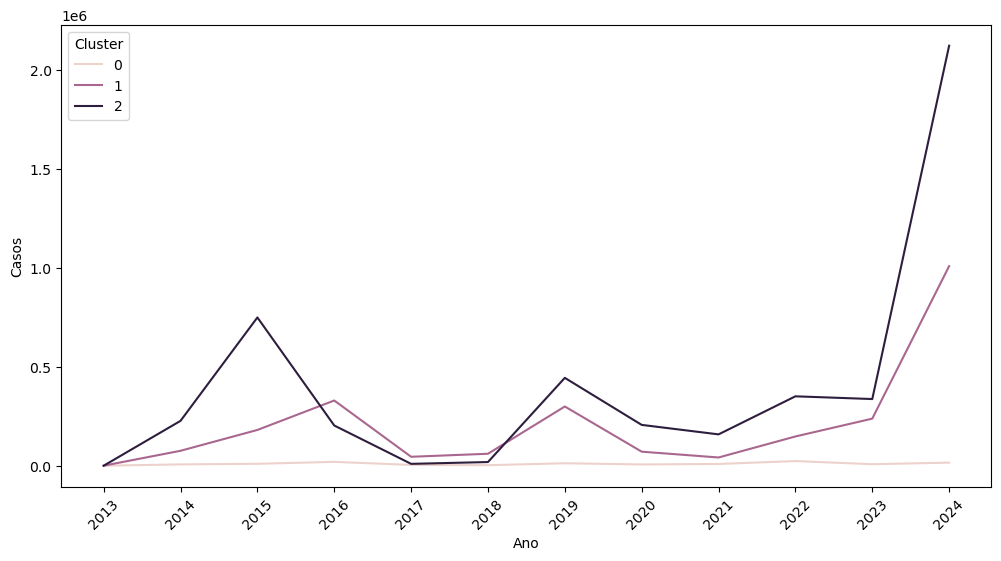

In [21]:
with PdfPages('analise_temporal_clusters.pdf') as pdf:
    plt.figure(figsize=(12, 6))
    sns.lineplot(data=df_melt, x='Ano', y='Casos', hue='Cluster', 
                estimator='median', errorbar=None)
    plt.xticks(rotation=45)
    pdf.savefig()

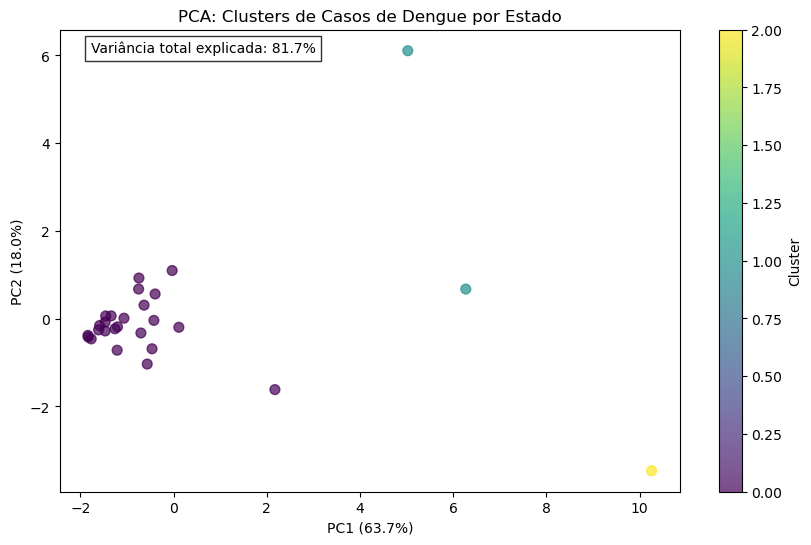

In [ ]:
# Aplicar PCA
X1_scaled2 = StandardScaler().fit_transform(resultado.filter(regex='^20[0-9]{2}$'))  # Apenas colunas de anos
pca1 = PCA(n_components=2)
X1_pca = pca1.fit_transform(X1_scaled2)

# Adicionar componentes ao DataFrame
resultado['PCA1'] = X1_pca[:, 0]
resultado['PCA2'] = X1_pca[:, 1]

# Calcular variância explicada
var_exp1 = pca1.explained_variance_ratio_
labels1 = [f'PC{i+1} ({var:.1%})' for i, var in enumerate(var_exp1)]

# Plotar
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    resultado['PCA1'], 
    resultado['PCA2'], 
    c=resultado['Cluster'], 
    cmap='viridis',
    s=50,
    alpha=0.7
)

# Adicionar rótulos com variância explicada
plt.xlabel(labels1[0])
plt.ylabel(labels1[1])
plt.title('PCA: Clusters de Casos de Dengue por Estado')

# Adicionar legendas e ajustes
plt.colorbar(scatter, label='Cluster')

# Mostrar variância total explicada
plt.text(
    0.05, 0.95, 
    f'Variância total explicada: {sum(var_exp1):.1%}',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8))
plt.show()

In [59]:
loadings = pd.DataFrame(
    pca1.components_.T,
    columns=['PC1', 'PC2'],
    index=X1.columns  # Nomes das variáveis originais (ex.: '2023', '2024', 'População')
)

In [60]:
print(loadings)

           PC1       PC2
2013  0.216216  0.504637
2014  0.331771 -0.071696
2015  0.323092 -0.167274
2016  0.274152  0.078227
2017  0.179005  0.538340
2018  0.205066  0.528744
2019  0.328492 -0.074398
2020  0.261491 -0.209511
2021  0.312920 -0.124510
2022  0.325825 -0.062486
2023  0.312415 -0.166996
2024  0.334017 -0.199990


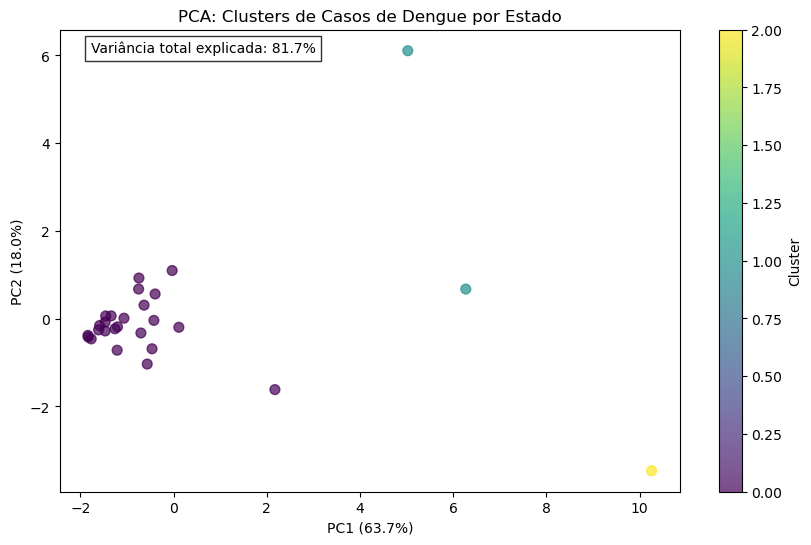

In [40]:
with PdfPages('pca_cluster.pdf') as pdf:
    # Plotar
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        resultado['PCA1'], 
        resultado['PCA2'], 
        c=resultado['Cluster'], 
        cmap='viridis',
        s=50,
        alpha=0.7
    )

    # Adicionar rótulos com variância explicada
    plt.xlabel(labels1[0])
    plt.ylabel(labels1[1])
    plt.title('PCA: Clusters de Casos de Dengue por Estado')

    # Adicionar legendas e ajustes
    plt.colorbar(scatter, label='Cluster')

    # Mostrar variância total explicada
    plt.text(
        0.05, 0.95, 
        f'Variância total explicada: {sum(var_exp1):.1%}',
        transform=plt.gca().transAxes,
        bbox=dict(facecolor='white', alpha=0.8))
    pdf.savefig()

ANÁLISE POPULACIONAL

In [55]:
# Carregue seus dados (substitua pelos seus arquivos):
df_pop = pd.read_excel("populacao_brasil_2024.xlsx")  # Colunas: Estado, Populacao_Total_2024

# Junte os dados e calcule a taxa:
dengue_pop = pd.merge(dengue_casos_por_ano, df_pop, on="UF de notificação")
dengue_pop["Taxa_2024"] = (dengue_pop["2024"] / dengue_pop["População"]) * 100000

# Salve o resultado:
dengue_pop.to_csv("dengue_taxa_2024.csv", index=False)

In [56]:
dengue_pop.drop(columns='Cluster', inplace=True)

In [57]:
dengue_pop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   UF de notificação  27 non-null     object 
 1   2013               27 non-null     int32  
 2   2014               27 non-null     int32  
 3   2015               27 non-null     int32  
 4   2016               27 non-null     int64  
 5   2017               27 non-null     int32  
 6   2018               27 non-null     int32  
 7   2019               27 non-null     int32  
 8   2020               27 non-null     int32  
 9   2021               27 non-null     int32  
 10  2022               27 non-null     int32  
 11  2023               27 non-null     int32  
 12  2024               27 non-null     int32  
 13  População          27 non-null     int64  
 14  Taxa_2024          27 non-null     float64
dtypes: float64(1), int32(11), int64(2), object(1)
memory usage: 2.1+ KB


c:\Users\isabe\anaconda3\envs\env_i\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


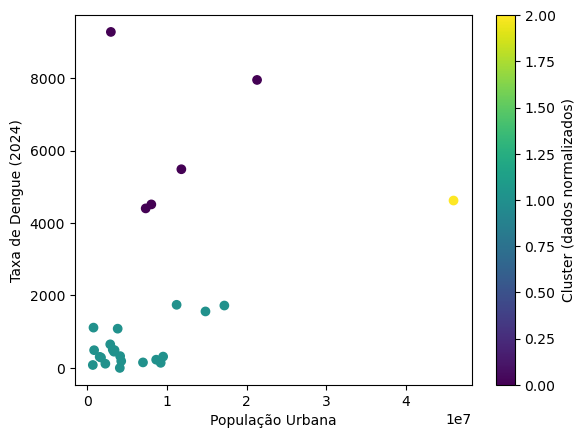

In [58]:
# 1. Selecionar variáveis
X2 = dengue_pop[["Taxa_2024", "População"]]

# 2. Normalizar (média=0, desvio=1)
scaler = StandardScaler()
X2_normalizado = scaler.fit_transform(X2)

# 3. Clusterização com dados normalizados
kmeans2 = KMeans(n_clusters=3)
dengue_pop["Cluster_pop_normalizado"] = kmeans2.fit_predict(X2_normalizado)

# 4. Visualizar
plt.scatter(
    dengue_pop["População"], 
    dengue_pop["Taxa_2024"], 
    c=dengue_pop["Cluster_pop_normalizado"],
    cmap="viridis"
)
plt.xlabel("População Urbana")
plt.ylabel("Taxa de Dengue (2024)")
plt.colorbar(label="Cluster (dados normalizados)")
plt.show()

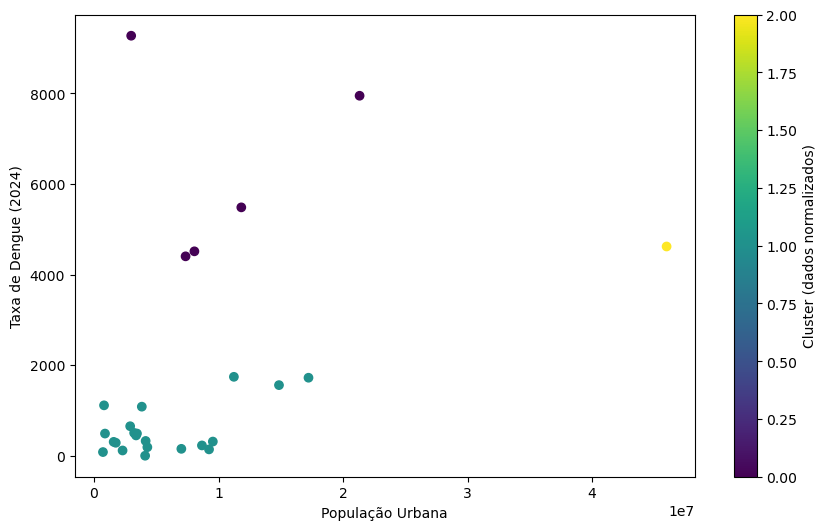

In [39]:
with PdfPages('k-means_cluster_pop.pdf') as pdf:
    # 4. Visualizar
    plt.figure(figsize=(10, 6))
    plt.scatter(
        dengue_pop["População"], 
        dengue_pop["Taxa_2024"], 
        c=dengue_pop["Cluster_pop_normalizado"],
        cmap="viridis"
    )
    plt.xlabel("População Urbana")
    plt.ylabel("Taxa de Dengue (2024)")
    plt.colorbar(label="Cluster (dados normalizados)")
    pdf.savefig()

Variância explicada por PC1: 71.2%
Variância explicada por PC2: 28.8%


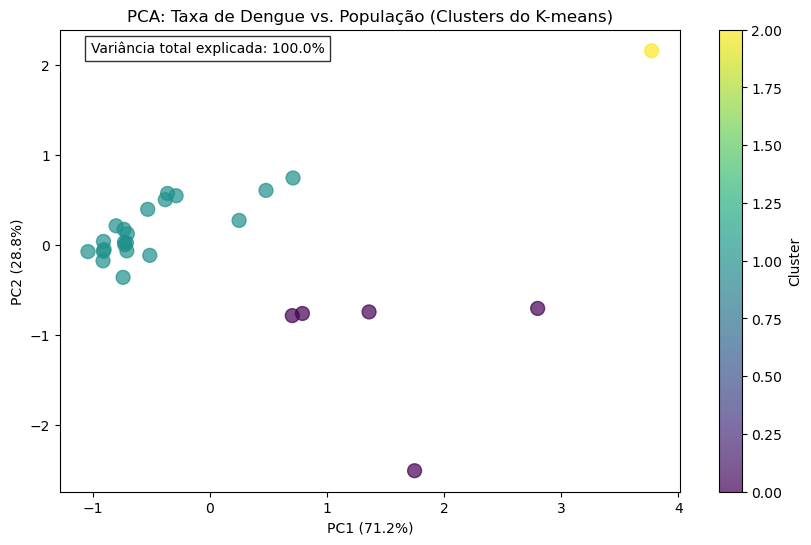

In [43]:
# 1. Dados já usados no K-means
X2 = dengue_pop[["Taxa_2024", "População"]]  # Mesmas variáveis do K-means

# 2. Padronize os dados (importante para o PCA)
scaler = StandardScaler()
X2_scaled = scaler.fit_transform(X2)

# 3. Aplique o PCA
pca2 = PCA(n_components=2)
X2_pca = pca2.fit_transform(X2_scaled)

# 4. Adicione os componentes ao DataFrame
dengue_pop["PCA1"] = X2_pca[:, 0]
dengue_pop["PCA2"] = X2_pca[:, 1]

# 5. Calcule a variância explicada
var_exp = pca2.explained_variance_ratio_
print(f"Variância explicada por PC1: {var_exp[0]:.1%}")
print(f"Variância explicada por PC2: {var_exp[1]:.1%}")

# 6. Plote com clusters do K-means
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    dengue_pop["PCA1"],
    dengue_pop["PCA2"],
    c=dengue_pop["Cluster_pop_normalizado"],  # Cores dos clusters do K-means
    s=100,
    alpha=0.7,
    )

# 7. Rótulos com variância explicada
plt.xlabel(f"PC1 ({var_exp[0]:.1%})")
plt.ylabel(f"PC2 ({var_exp[1]:.1%})")
plt.title("PCA: Taxa de Dengue vs. População (Clusters do K-means)")

# 8. Adicione legendas
plt.colorbar(scatter, label="Cluster")
# Mostrar variância total explicada
plt.text(
    0.05, 0.95, 
    f'Variância total explicada: {sum(var_exp):.1%}',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8))

plt.show()

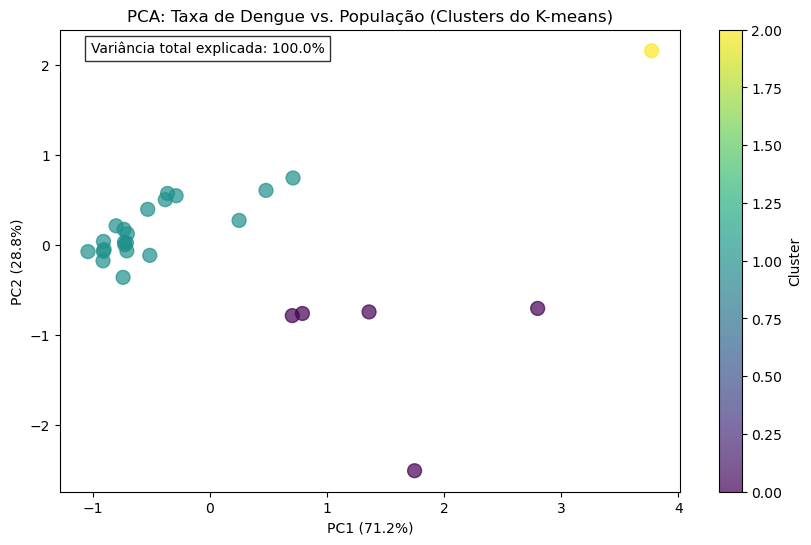

In [44]:
with PdfPages('pca_cluster_pop.pdf') as pdf:
    # 6. Plote com clusters do K-means
    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        dengue_pop["PCA1"],
        dengue_pop["PCA2"],
        c=dengue_pop["Cluster_pop_normalizado"],  # Cores dos clusters do K-means
        s=100,
        alpha=0.7,
        )

    # 7. Rótulos com variância explicada
    plt.xlabel(f"PC1 ({var_exp[0]:.1%})")
    plt.ylabel(f"PC2 ({var_exp[1]:.1%})")
    plt.title("PCA: Taxa de Dengue vs. População (Clusters do K-means)")

    # 8. Adicione legendas
    plt.colorbar(scatter, label="Cluster")
    # Mostrar variância total explicada
    plt.text(
    0.05, 0.95, 
    f'Variância total explicada: {sum(var_exp):.1%}',
    transform=plt.gca().transAxes,
    bbox=dict(facecolor='white', alpha=0.8))
    pdf.savefig()

In [35]:
cluster_2 = dengue_pop[['UF de notificação', 'Cluster_pop_normalizado']]

In [36]:
cluster_2.copy().rename(columns={'Cluster_pop_normalizado':'Cluster_pop'}, inplace=True)

In [37]:
clusters_estados = pd.merge(clusters_estados, cluster_2, on='UF de notificação')

In [38]:
clusters_estados.to_excel('clusters_estados.xlsx')